In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.5 MB/s eta 0:00:00


In [3]:
df = pd.read_csv('/content/fraudTrain.csv')

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
#First checking for duplicate and null values:

print(df[df.duplicated() == True])
#as we can see here, we have no duplicated rows

print(df.isnull().sum())
#as we can see here, we have no null value inside any column

Empty DataFrame
Columns: [Unnamed: 0, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

[0 rows x 23 columns]
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


**The code checks for duplicate rows and null values in a DataFrame named df. It prints duplicated rows, and if any are found, none are displayed. Then, it prints the count of null values in each column, and as indicated, there are no null values in any column.**

In [ ]:
print(df.dtypes)
#intially, checking the types of our columns

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


**This code prints the data types of columns in a DataFrame named df. It's used to initially inspect the types of data stored in each column of the dataset.**

# **Exploratory Data Analysis EDA**

# **Statistical Analysis and Data visualization**

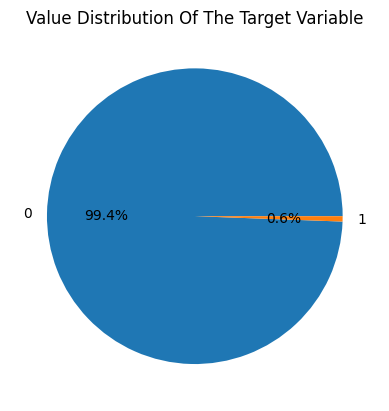

In [ ]:
data = df['is_fraud'].value_counts()

plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title("Value Distribution Of The Target Variable")
plt.show()

#Here, we know that we are dealing with an imbalanced dataset.

**This code generates a pie chart to visualize the distribution of values in the 'is_fraud' column of the DataFrame. It helps to illustrate the proportion of fraudulent and non-fraudulent transactions in the dataset, highlighting that the dataset is imbalanced, meaning one class occurs much more frequently than the other.**

# **Summary statistics for the entire dataset**

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


# **Summary statistics for the non fraud transactions**

In [ ]:
print('Summary statistics of non-fraudulent transactions:')
non_fraud_dataSet = df[df['is_fraud'] == 0]
non_fraud_dataSet.describe()

Summary statistics of non-fraudulent transactions:


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1289169.0
mean,6.484732e+05,4.172901e+17,6.766711e+01,4.880511e+04,3.853689e+01,-9.022814e+01,8.877523e+04,1.349249e+09,3.853666e+01,-9.022827e+01,0.0
std,3.741526e+05,1.308990e+18,1.540080e+02,2.689099e+04,5.075234e+00,1.375598e+01,3.018065e+05,1.283514e+07,5.109144e+00,1.376794e+01,0.0
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.0
25%,3.246100e+05,1.800429e+14,9.610000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338759e+09,3.473145e+01,-9.689853e+01,0.0
50%,6.484110e+05,3.521417e+15,4.728000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349254e+09,3.936528e+01,-8.744091e+01,0.0
75%,9.723990e+05,4.642255e+15,8.254000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359378e+09,4.195705e+01,-8.023853e+01,0.0
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.568990e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.668291e+01,-6.695090e+01,0.0


# **Summary statistics for the fraud transactions**

In [ ]:
print('Summary statistics of fraudulent transactions:')
fraud_dataSet = df[df['is_fraud'] == 1]
fraud_dataSet.describe()


Summary statistics of fraudulent transactions:


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,7.506000e+03,7.506000e+03,7506.000000,7506.000000,7506.000000,7506.000000,7.506000e+03,7.506000e+03,7506.000000,7506.000000,7506.0
mean,6.249497e+05,4.003577e+17,531.320092,48038.714229,38.663609,-89.916041,9.727676e+04,1.348389e+09,38.653901,-89.915808,1.0
std,4.010560e+05,1.276871e+18,390.560070,27265.558212,5.172289,14.278221,3.265815e+05,1.383020e+07,5.218387,14.298685,0.0
min,2.449000e+03,6.041621e+10,1.060000,1330.000000,20.027100,-165.672300,2.300000e+01,1.325466e+09,19.425114,-166.550779,1.0
25%,2.398565e+05,1.800429e+14,245.662500,24927.000000,35.056100,-96.701000,7.465000e+02,1.335744e+09,35.114671,-96.671038,1.0
50%,6.381620e+05,3.528041e+15,396.505000,46290.000000,39.433600,-86.691900,2.623000e+03,1.348872e+09,39.427008,-86.813044,1.0
75%,9.849215e+05,4.651007e+15,900.875000,71107.000000,42.073175,-79.941600,2.143700e+04,1.360021e+09,41.986902,-79.907096,1.0
max,1.295733e+06,4.992346e+18,1376.040000,99783.000000,66.693300,-68.556500,2.906700e+06,1.371787e+09,67.510267,-67.569238,1.0


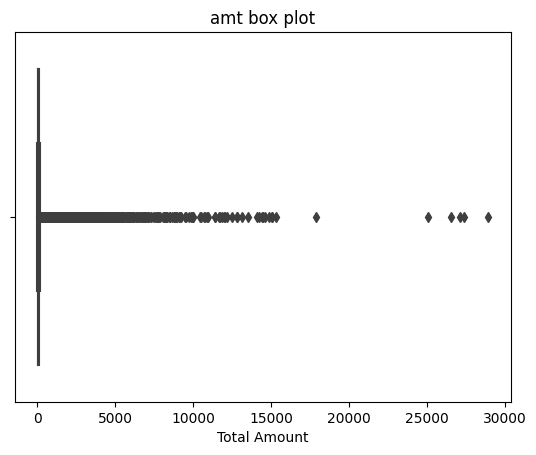

In [ ]:

sns.boxplot(x = df['amt'])
plt.title('amt box plot')
plt.xlabel('Total Amount')
plt.show()

#This box plot shows that the amt values have outliers however, the summary descriptions above this box plot show that...
#...the mean of the amount column is way higher when fraudulent transactions are made so...
#... we can know these can be inherent characteristics of fraudulent transactions


**The box plot is used to visualize the distribution of values in the 'amt' column. The comment suggests that the box plot reveals the presence of outliers in the 'amt' values. Additionally, it mentions that the summary descriptions above the box plot indicate that the mean of the 'amt' column is significantly higher when fraudulent transactions occur. The interpretation is that these outliers might be inherent characteristics of fraudulent transactions.**

**In summary, this code generates a box plot to visually inspect the distribution of the 'amt' column in the DataFrame, with a focus on understanding the presence of outliers and their potential connection to fraudulent transactions.**

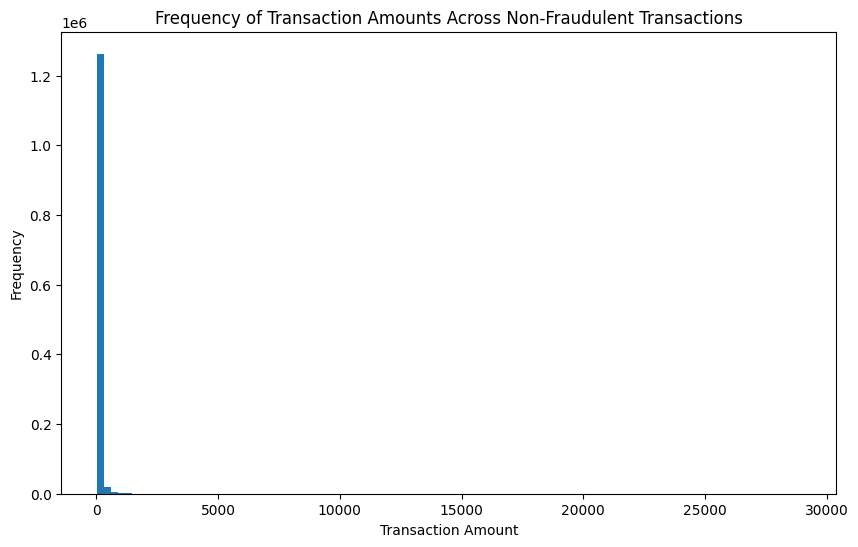

In [ ]:
non_fraud_dataSet = df[df.is_fraud == 0]
data = non_fraud_dataSet['amt']
plt.figure(figsize=(10, 6))
plt.hist(data, bins = 100)
plt.title('Frequency of Transaction Amounts Across Non-Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

#This graph shows that the vast majority of non-fraudulent transactions are clustered around small amounts,...
#...close to 0. The frequency drops as the transaction amount increases.

**This code generates a histogram to display the distribution of transaction amounts for non-fraudulent transactions in the dataset. The x-axis represents different ranges of transaction amounts, and the y-axis represents the frequency of transactions within each range. The graph visually illustrates that the majority of non-fraudulent transactions have smaller amounts, with the frequency decreasing as the transaction amount increases.**

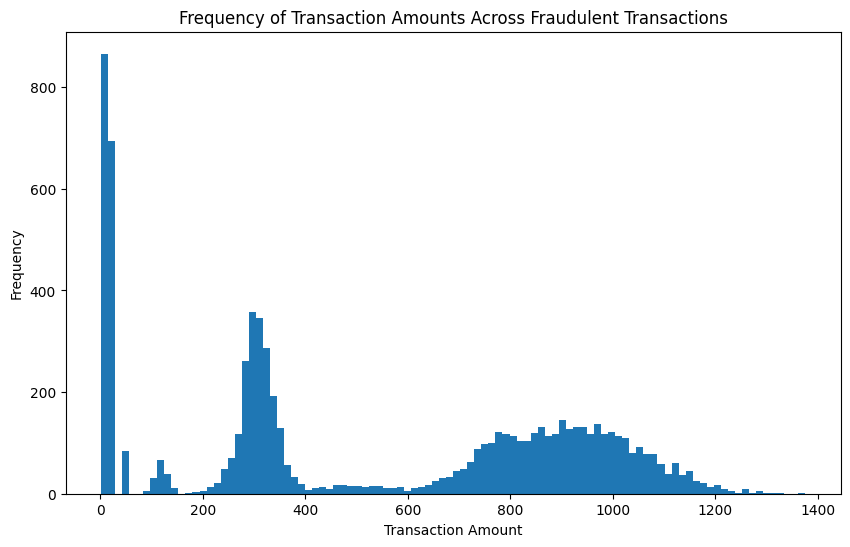

In [ ]:
fraud_dataSet = df[df.is_fraud == 1]
data = fraud_dataSet['amt']
plt.figure(figsize=(10, 6))
plt.hist(data, bins = 100)
plt.title('Frequency of Transaction Amounts Across Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# This graph shows that while the highest frequency of fraudulent transactions is also at amounts close to 0,...
#...there is a wider distribution of transaction amounts with noticeable frequencies between 200 and 1200.

**This code generates a histogram to display the distribution of transaction amounts for fraudulent transactions in the dataset. The x-axis represents different ranges of transaction amounts, and the y-axis represents the frequency of transactions within each range. The graph visually illustrates that, unlike non-fraudulent transactions, fraudulent transactions have a wider distribution of transaction amounts. While the highest frequency is still around smaller amounts, there are noticeable frequencies between 200 and 1200.**

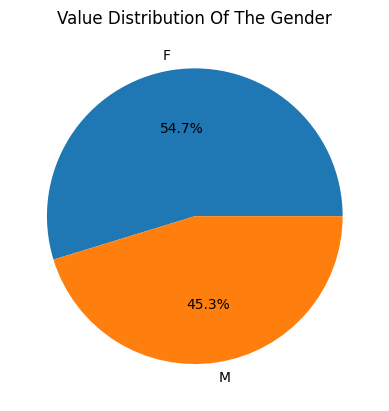

<Figure size 1000x600 with 0 Axes>

In [ ]:
data = df['gender'].value_counts()

plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title("Value Distribution Of The Gender")
plt.figure(figsize=(10, 6))
plt.show()

#Here, we can observe that the value distribution of gender are almost equal.

**This code generates a pie chart to visualize the distribution of values in the 'gender' column of the dataset. The chart displays the percentage distribution of each gender category. In this particular dataset, the value distribution of gender is nearly equal, as indicated by the roughly equal proportions in the pie chart for each gender category.**

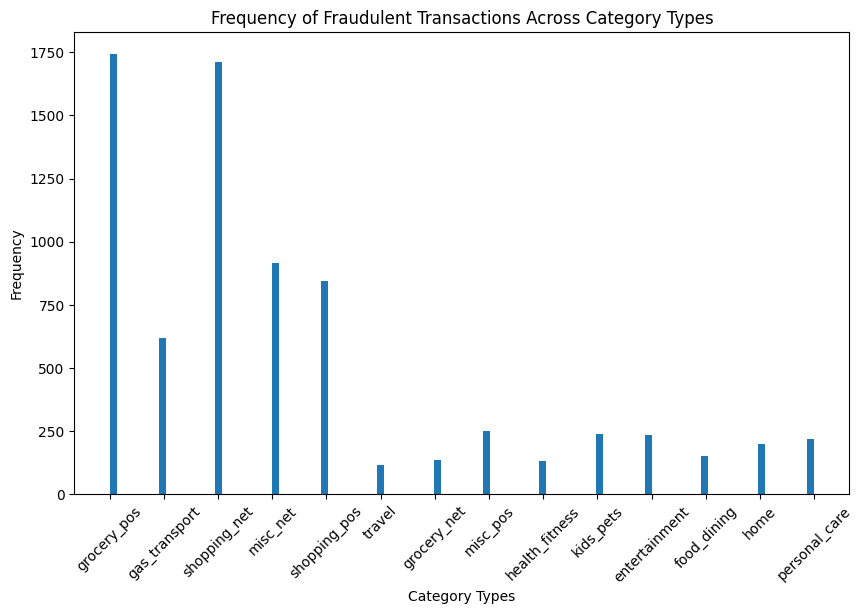

In [ ]:

fraud_dataSet = df[df['is_fraud'] == 1]

data = fraud_dataSet['category']
plt.figure(figsize=(10, 6))
plt.hist(data, bins = 100)
plt.title('Frequency of Fraudulent Transactions Across Category Types')
plt.xlabel('Category Types')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

#As we can observe, the categories that were mostly used for fraudulent transactions are: grocery_pos and shopping_net

**This code generates a histogram to visualize the frequency distribution of fraudulent transactions across different category types. The chart displays the counts of fraudulent transactions in each category, and it indicates that the categories 'grocery_pos' and 'shopping_net' have the highest frequencies for fraudulent transactions.**

In [ ]:
#Feature Selection/Extraction:

df['trans_date_trans_time']= df['trans_date_trans_time'].str[10:13]
#taking only the hour time from this format: 'M/D/YYYY  HH:MM:SS AM/PM'

df = df.rename(columns={'trans_date_trans_time': 'trans_hour'})

print(df['trans_hour'].unique())

[' 00' ' 01' ' 02' ' 03' ' 04' ' 05' ' 06' ' 07' ' 08' ' 09' ' 10' ' 11'
 ' 12' ' 13' ' 14' ' 15' ' 16' ' 17' ' 18' ' 19' ' 20' ' 21' ' 22' ' 23']


**This code extracts the hour information from the 'trans_date_trans_time' column, which originally contains the date and time information in the format 'M/D/YYYY HH:MM:SS AM/PM'. After extraction, the column is renamed to 'trans_hour'. The unique values of the 'trans_hour' column are then printed, showing the distinct hours present in the dataset.**

***Dropping Uneccesary Coloumns***

In [ ]:

df = df.drop(columns=['cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'city_pop','job', 'trans_num', 'unix_time' ])


In [ ]:
df['lat'] = abs(df['lat'] - df['merch_lat'])
df['long'] = abs(df['long'] - df['merch_long'])

df = df.rename(columns = {'long': 'long_distance', 'lat': 'lat_distance'})

df = df.drop(columns=['merch_lat'])
df = df.drop(columns=['merch_long'])


**This code calculates the absolute differences between the latitude and longitude of the transaction location and the merchant location. The resulting differences are stored in new columns named 'lat_distance' and 'long_distance'. The original columns 'merch_lat' and 'merch_long' are then dropped from the dataset. This process helps create features representing the distance between the transaction and merchant locations.**

In [ ]:
df['dob'] = df['dob'].str[0:4]
#taking only the birth year from this format: 'M/D/YYYY' so we can get the age of the card holder

df['dob'] = df['dob'].astype(int)
#turning the column to integer values so we can get the age(performing a column type transformation)

df['dob'] = 2020 - df['dob'] #because the dataset has transacions up until no more than 2020
df = df.rename(columns={'dob': 'age'})


**This code extracts the birth year from the 'dob' (date of birth) column, converts it to integer values, and calculates the age of the cardholder by subtracting the birth year from 2020. The resulting age values are then stored in a new column named 'age'.**

# **Entire the dataframe after feature Selection/Extraction**

In [ ]:
print(df.head())

   Unnamed: 0 trans_hour       category     amt gender  lat_distance  \
0           0         00       misc_net    4.97      F      0.067507   
1           1         00    grocery_pos  107.23      F      0.271247   
2           2         00  entertainment  220.11      M      0.969904   
3           3         00  gas_transport   45.00      M      0.803731   
4           4         00       misc_pos   41.96      M      0.254299   

   long_distance  age  is_fraud  
0       0.870215   32         0  
1       0.024038   42         0  
2       0.107519   58         0  
3       0.447271   53         0  
4       0.830441   34         0  


In [ ]:
#This part is for encoding:
print('number of different hours: ', len(df['trans_hour'].unique()), '==>',df['trans_hour'].unique() )
#Now we can use label encoding on the trans_hour column

le=LabelEncoder()
df['trans_hour'] = le.fit_transform(df['trans_hour'])
#we then renamed the column to trans_hour


number of different hours:  24 ==> [' 00' ' 01' ' 02' ' 03' ' 04' ' 05' ' 06' ' 07' ' 08' ' 09' ' 10' ' 11'
 ' 12' ' 13' ' 14' ' 15' ' 16' ' 17' ' 18' ' 19' ' 20' ' 21' ' 22' ' 23']


**This code checks the number of different hours in the 'trans_hour' column, prints the unique hours, and then uses label encoding (assigning numeric labels to each unique hour) on the 'trans_hour' column. The resulting encoded values are stored in the same column, and it is then renamed to 'trans_hour'.**

In [ ]:
print('number of different categories: ', len(df['category'].unique()))
#Performing binary encoding on the 'category' column
encoder = ce.BinaryEncoder(cols=['category'])

df_binary=encoder.fit_transform(df['category'])

df = pd.concat([df, df_binary], axis=1) #this line is to add the new encoded columns inside the dataframe

df = df.drop(columns=['category'])#dropping the main category column after adding the new encoded columns inside df

number of different categories:  14


**This code prints the number of different categories in the 'category' column, performs binary encoding on the 'category' column using the BinaryEncoder from the category_encoders library, and adds the new encoded columns to the original DataFrame. Finally, it drops the original 'category' column from the DataFrame.**

In [ ]:
print('number of different genders: ', len(df['gender'].unique()), '==>', df['gender'].unique() )
#Now we can use one hot encoding on the gender column

df = pd.get_dummies(df, columns=['gender'], prefix = 'gender')


number of different genders:  2 ==> ['F' 'M']


**This code prints the number of different values in the 'gender' column, performs one-hot encoding on the 'gender' column using the pd.get_dummies function, and adds the new one-hot encoded columns to the original DataFrame.**

In [ ]:
#checking the types of all the columns after done with feature selection/extraction, encoding, etc...
print(df.dtypes)
print(df.head())

Unnamed: 0         int64
trans_hour         int64
amt              float64
lat_distance     float64
long_distance    float64
age                int64
is_fraud           int64
category_0         int64
category_1         int64
category_2         int64
category_3         int64
gender_F            bool
gender_M            bool
dtype: object
   Unnamed: 0  trans_hour     amt  lat_distance  long_distance  age  is_fraud  \
0           0           0    4.97      0.067507       0.870215   32         0   
1           1           0  107.23      0.271247       0.024038   42         0   
2           2           0  220.11      0.969904       0.107519   58         0   
3           3           0   45.00      0.803731       0.447271   53         0   
4           4           0   41.96      0.254299       0.830441   34         0   

   category_0  category_1  category_2  category_3  gender_F  gender_M  
0           0           0           0           1      True     False  
1           0           0     

**This code prints the data types of all columns in the DataFrame and displays the first few rows of the DataFrame. It helps verify the changes made during feature selection/extraction, encoding, etc. for further analysis.**

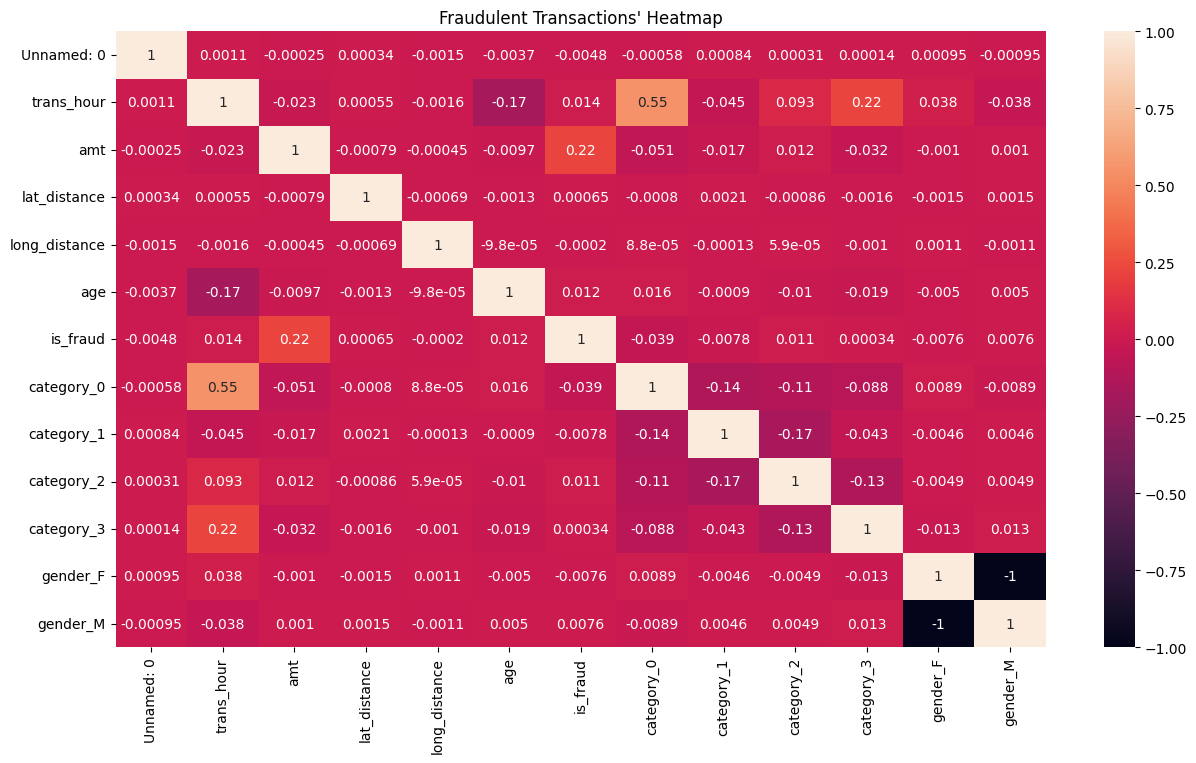

In [ ]:
#this part is for seeing correlations. (Checking heatmap after being done with everything)

df_test = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(df_test, annot=True)
plt.title("Fraudulent Transactions' Heatmap")
plt.show()

**This code generates a heatmap to visualize the correlations between different features in the DataFrame after various data processing steps. It helps identify potential relationships between variables, specifically focusing on fraudulent transactions.**

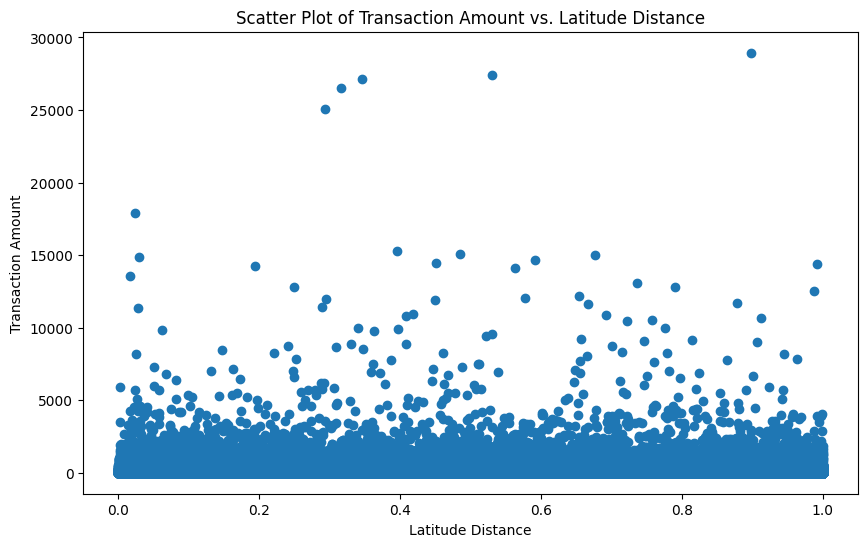

In [ ]:
#Some additional Data visualizations: (That were added during the final phase of the project)

plt.figure(figsize=(10, 6))
plt.scatter(df['lat_distance'], df['amt'])
plt.title('Scatter Plot of Transaction Amount vs. Latitude Distance')
plt.xlabel('Latitude Distance')
plt.ylabel('Transaction Amount')
plt.show()

**This code creates a scatter plot to visualize the relationship between the 'Latitude Distance' and 'Transaction Amount' columns in the DataFrame. Each point on the plot represents a transaction, allowing for the observation of any patterns or trends between these two variables.**

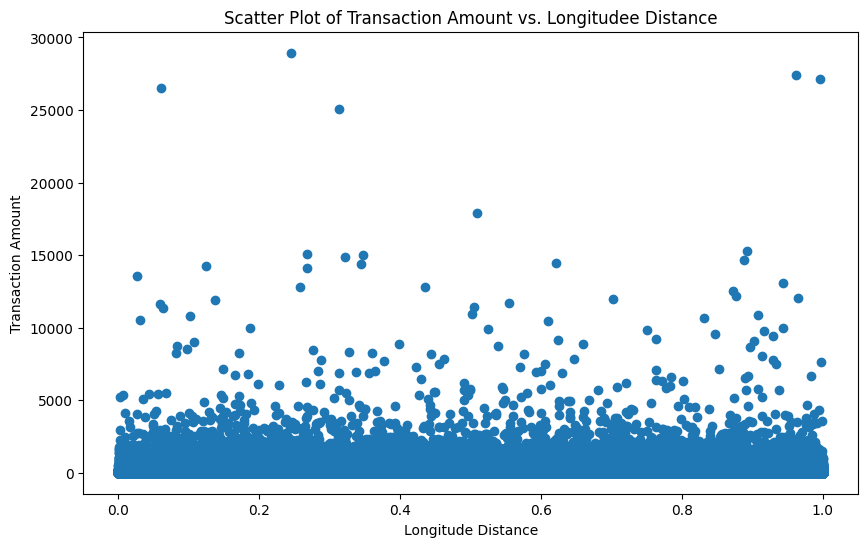

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['long_distance'], df['amt'])
plt.title('Scatter Plot of Transaction Amount vs. Longitudee Distance')
plt.xlabel('Longitude Distance')
plt.ylabel('Transaction Amount')
plt.show()

**This code generates a scatter plot illustrating the correlation between the 'Longitude Distance' and 'Transaction Amount' columns in the DataFrame. Each point on the plot represents a transaction, providing insight into any relationships or patterns between these two variables.**

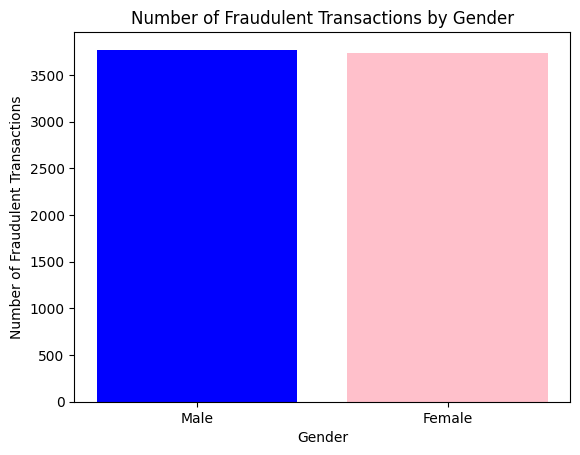

In [ ]:
#Fraudulent transcations with respect to gender

maleFraud = df[(df['gender_M'] == 1) & (df['is_fraud'] == 1)]
maleFraud_count = df[(df['gender_M'] == 1) & (df['is_fraud'] == 1)]['is_fraud'].sum()

femaleFraud = df[(df['gender_F'] == 1) & (df['is_fraud'] == 1)]
femaleFraud_count = df[(df['gender_F'] == 1) & (df['is_fraud'] == 1)]['is_fraud'].sum()

gender = ['Male', 'Female']
fraud_counts = [maleFraud_count, femaleFraud_count]

plt.bar(gender, fraud_counts, color=['blue', 'pink'])
plt.title('Number of Fraudulent Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

**This code generates a bar chart to visualize the number of fraudulent transactions based on gender. It separates the data into 'Male' and 'Female' categories, counting and displaying the occurrences of fraudulent transactions for each gender in distinct colors on the chart.**

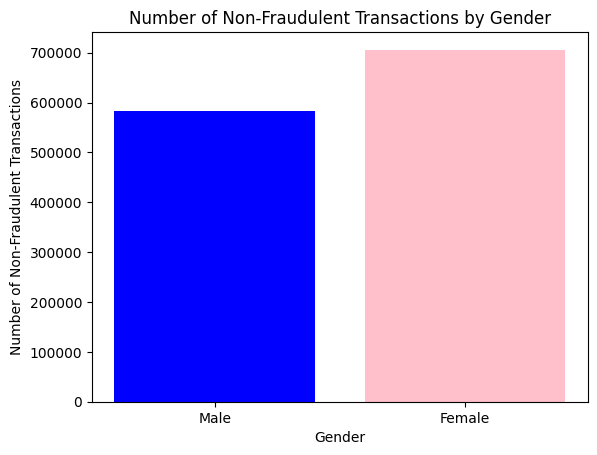

In [ ]:
#non-Fraudulent transcations with respect to gender

#Include only non-fraudulent transactions
non_fraudulent_transactions = df[df['is_fraud'] == 0]

male_non_fraud_count = non_fraudulent_transactions[non_fraudulent_transactions['gender_M'] == 1]['is_fraud'].count()
female_non_fraud_count = non_fraudulent_transactions[non_fraudulent_transactions['gender_F'] == 1]['is_fraud'].count()

gender = ['Male', 'Female']
non_fraud_counts = [male_non_fraud_count, female_non_fraud_count]

plt.bar(gender, non_fraud_counts, color=['blue', 'pink'])
plt.title('Number of Non-Fraudulent Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Non-Fraudulent Transactions')
plt.show()

**This code creates a bar chart illustrating the number of non-fraudulent transactions based on gender. It filters the dataset to include only non-fraudulent transactions and then counts and displays the occurrences for each gender in the 'Male' and 'Female' categories. The resulting bar chart distinguishes between the counts for males and females using different colors.**

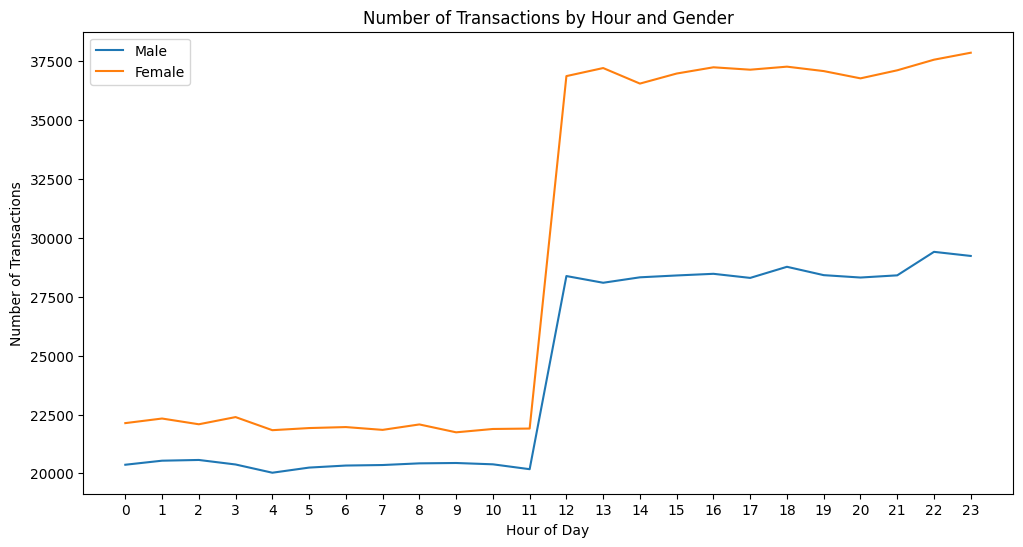

In [ ]:
#The hours of all transactions with respect to gender

hourly_transactions_male = df[df['gender_M'] == 1].groupby('trans_hour').size()
hourly_transactions_female = df[df['gender_F'] == 1].groupby('trans_hour').size()


plt.figure(figsize=(12, 6))
plt.plot(hourly_transactions_male.index, hourly_transactions_male.values, label='Male')
plt.plot(hourly_transactions_female.index, hourly_transactions_female.values, label='Female')


plt.title('Number of Transactions by Hour and Gender')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))  # because we have a 24hr format

plt.legend() #added on the top left, for making visualization easier

plt.show()

This code generates a line chart to visualize the distribution of transactions throughout the day, categorized by gender. It filters the dataset to separate transactions for males and females, then groups the data by the hour of the day ('trans_hour'). The resulting line chart displays the number of transactions on the y-axis against the hours of the day on the x-axis. Separate lines are used for males and females, and the legend helps distinguish between the two categories. The x-axis is labeled as 'Hour of Day,' and the y-axis represents the 'Number of Transactions.'

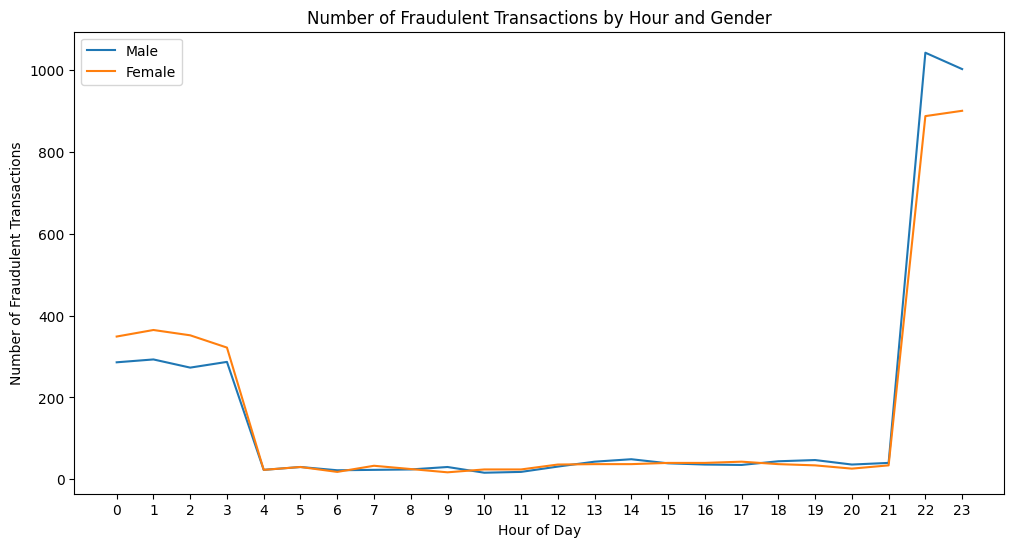

In [ ]:
#The hours of ONLY fraudulent transactions with respect to gender

#Filtering to only fraudulent trasactions
fraud_df = df[df['is_fraud'] == 1]

hourly_fraud_male = fraud_df[fraud_df['gender_M'] == 1].groupby('trans_hour').size()
hourly_fraud_female = fraud_df[fraud_df['gender_F'] == 1].groupby('trans_hour').size()

plt.figure(figsize=(12, 6))
plt.plot(hourly_fraud_male.index, hourly_fraud_male.values, label='Male')
plt.plot(hourly_fraud_female.index, hourly_fraud_female.values, label='Female')

plt.title('Number of Fraudulent Transactions by Hour and Gender')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(range(0, 24))  # because we have a 24 hr format
plt.legend()

plt.show()


This code creates a line chart specifically for fraudulent transactions, categorized by gender. It first filters the dataset to include only fraudulent transactions **(df['is_fraud'] == 1)**. Then, it separates the data for males and females** (gender_M == 1 and gender_F == 1)**, and groups the information by the hour of the day ('trans_hour'). The **resulting chart displays two lines, one for males and one for females, showing the number of fraudulent transactions on the y-axis against the hours of the day on the x-axis**. The **x-axis is labeled as 'Hour of Day**,' and the **y-axis represents the 'Number of Fraudulent Transactions**.' The legend helps distinguish between male and female categories.

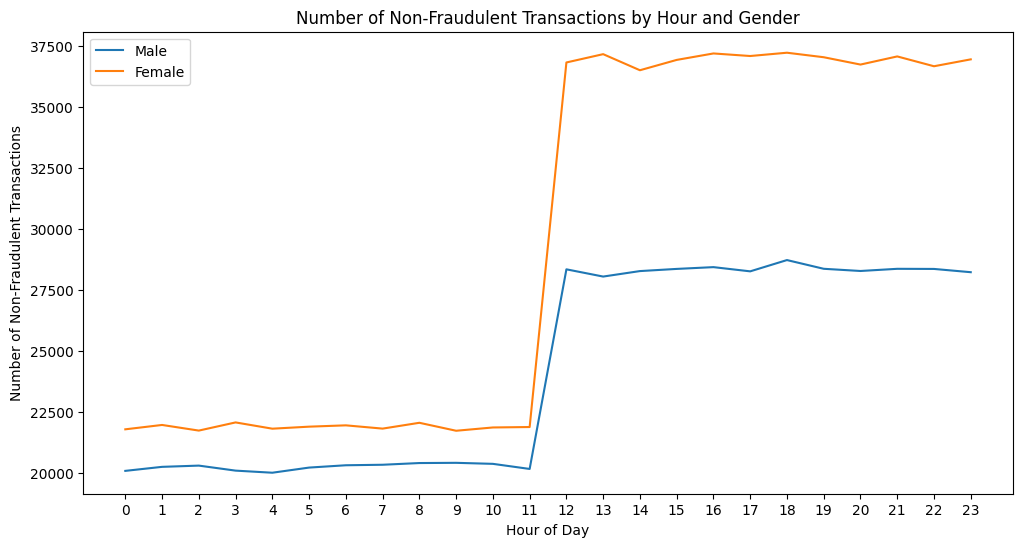

In [ ]:
#The hours of ONLY non-fraudulent transactions with respect to gender

#Filtering to only non-fraudulent transactions
non_fraud_df = df[df['is_fraud'] == 0]

hourly_non_fraud_male = non_fraud_df[non_fraud_df['gender_M'] == 1].groupby('trans_hour').size()
hourly_non_fraud_female = non_fraud_df[non_fraud_df['gender_F'] == 1].groupby('trans_hour').size()

plt.figure(figsize=(12, 6))
plt.plot(hourly_non_fraud_male.index, hourly_non_fraud_male.values, label='Male')
plt.plot(hourly_non_fraud_female.index, hourly_non_fraud_female.values, label='Female')

plt.title('Number of Non-Fraudulent Transactions by Hour and Gender')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Non-Fraudulent Transactions')
plt.xticks(range(0, 24))  #because we have a 24 hour format
plt.legend()

plt.show()

This code generates a line chart illustrating the hourly distribution of non-fraudulent transactions, categorized by gender. It begins by isolating non-fraudulent transactions **(df['is_fraud'] == 0)**. Then, it further segregates the data for males and females **(gender_M == 1 and gender_F == 1)** and groups the information by the hour of the day ('trans_hour'). The resulting chart displays two lines, one for males and one for females, showing the number of non-fraudulent transactions on the y-axis against the hours of the day on the x-axis. The **x-axis is labeled as 'Hour of Day**,' and **the y-axis represents the 'Number of Non-Fraudulent Transactions**.' The legend aids in distinguishing between male and female categories.

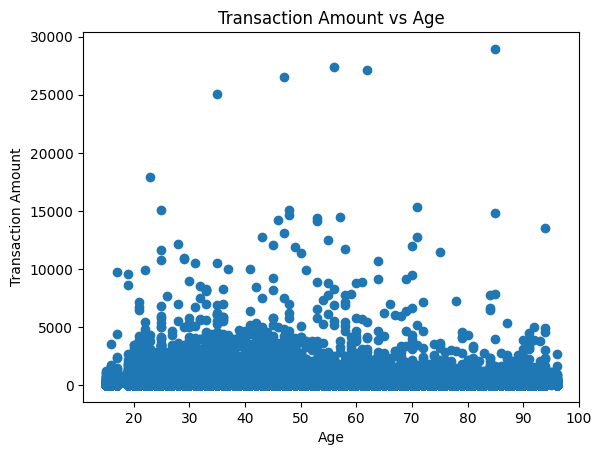

In [ ]:
#Relationship between (transaction amount of every purchase) and (age)

plt.scatter(df['age'], df['amt'])
plt.title('Transaction Amount vs Age')
plt.xlabel('Age')
plt.ylabel('Transaction Amount')
plt.show()

This code generates a scatter plot depicting the relationship between the **age of credit card holders ('Age')** and the** corresponding transaction amounts ('Transaction Amount')**. Each point on the plot represents an individual transaction, with the x-axis representing the age of the cardholder and the y-axis representing the transaction amount. The **title of the plot is "Transaction Amount vs Age**," with the **x-axis labeled as 'Age'** and the **y-axis as 'Transaction Amount.**' This visualization provides an overview of how transaction amounts vary across different age groups.

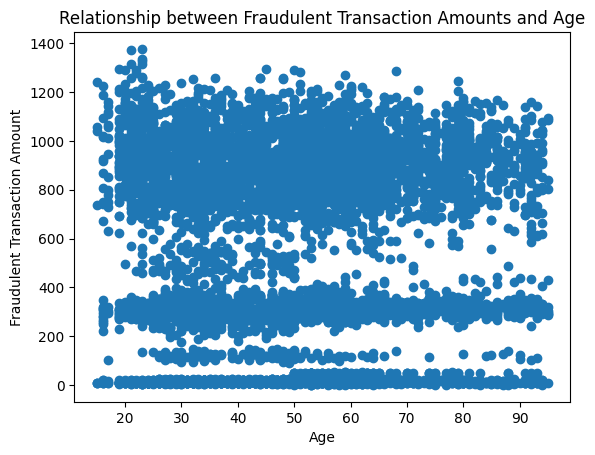

In [ ]:
#Relationship between (fraudulent transaction amounts of every purchase) and (age)

#Including only fraudulent transactions
fraudulent_transactions = df[df['is_fraud'] == 1]

plt.scatter(fraudulent_transactions['age'], fraudulent_transactions['amt'])
plt.title('Relationship between Fraudulent Transaction Amounts and Age')
plt.xlabel('Age')
plt.ylabel('Fraudulent Transaction Amount')
plt.show()

This code generates a scatter plot specifically focusing on fraudulent transactions. It displays the relationship between the age of credit card holders ('Age') and the corresponding transaction amounts ('Transaction Amount') for transactions labeled as fraudulent. Each point on the plot represents an individual fraudulent transaction, with the x-axis representing the age of the cardholder and the y-axis representing the fraudulent transaction amount. The title of the plot is "Relationship between Fraudulent Transaction Amounts and Age," with the x-axis labeled as 'Age' and the y-axis as 'Fraudulent Transaction Amount.' This visualization provides insights into how fraudulent transaction amounts vary across different age groups.

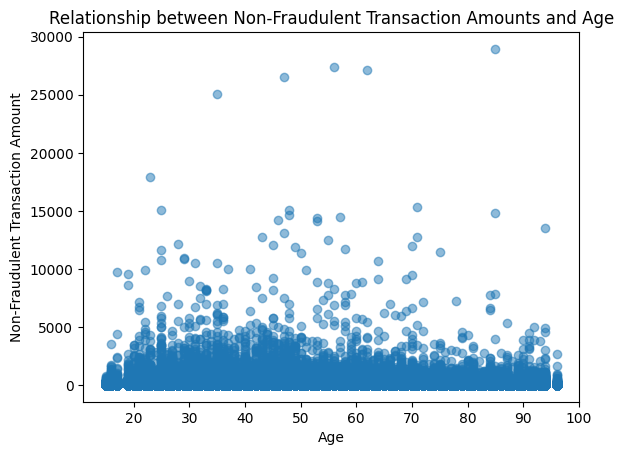

In [ ]:
#Relationship between (non-fraudulent transaction amounts of every purchase) and (age)

#Including only non-fraudulent transactions
non_fraudulent_transactions = df[df['is_fraud'] == 0]

plt.scatter(non_fraudulent_transactions['age'], non_fraudulent_transactions['amt'], alpha=0.5)
plt.title('Relationship between Non-Fraudulent Transaction Amounts and Age')
plt.xlabel('Age')
plt.ylabel('Non-Fraudulent Transaction Amount')
plt.show()

**This code creates a scatter plot showing the relationship between the age of credit card holders and non-fraudulent transaction amounts. Each point represents a non-fraudulent transaction, with age on the x-axis and transaction amount on the y-axis. The plot helps visualize how transaction amounts vary across different age groups for non-fraudulent transactions.**

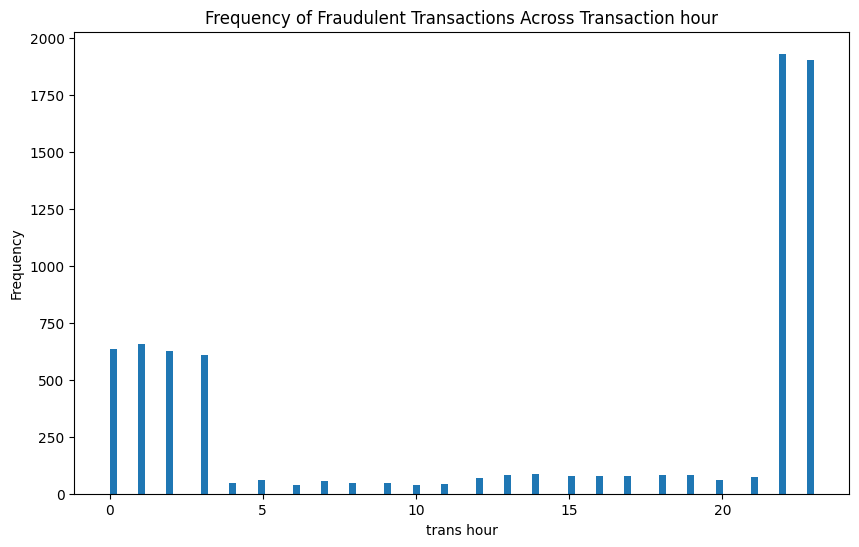

In [ ]:
fraud_dataSet = df[df['is_fraud'] == 1]
data = fraud_dataSet['trans_hour']
plt.figure(figsize=(10, 6))
plt.hist(data, bins = 100)
plt.title('Frequency of Fraudulent Transactions Across Transaction hour')
plt.xlabel('trans hour')
plt.ylabel('Frequency')
plt.show()
#we observe that most of the fraudulent transactions done are during 10PM (22) and 11PM(23).

**This code analyzes the frequency distribution of fraudulent transactions based on the hour of the day. It creates a histogram where each bar represents the count of fraudulent transactions for a specific hour. The x-axis represents the transaction hour, and the y-axis represents the frequency of fraudulent transactions. The observation from the histogram suggests that the majority of fraudulent transactions occur during the hours of 10 PM (22) and 11 PM (23).**

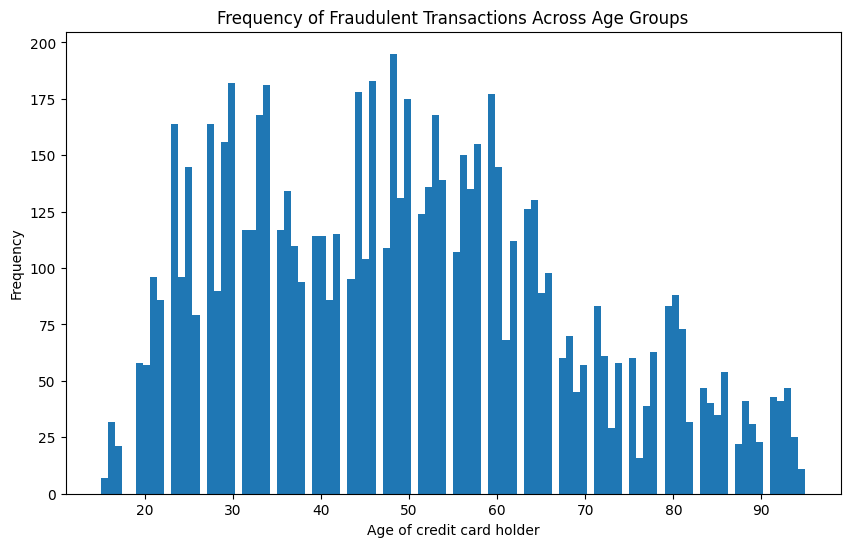

In [ ]:
fraud_dataSet = df[df.is_fraud == 1]
data = fraud_dataSet['age']
plt.figure(figsize=(10, 6))
plt.hist(data, bins = 100)
plt.title('Frequency of Fraudulent Transactions Across Age Groups')
plt.xlabel('Age of credit card holder')
plt.ylabel('Frequency')
plt.show()
#we observe that indviduals within the ages of 30-60 have the most fraudulent transactions.

This code generates a histogram to visualize the frequency distribution of fraudulent transactions across different age groups. The x-axis represents the age of the credit card holder, and the y-axis shows the frequency of fraudulent transactions. The observation from the histogram indicates that individuals in the age range of 30 to 60 years tend to have the highest frequency of fraudulent transactions.

# **AUC_ROC CURVE**

In [ ]:
#Got this code from the internet so we can visualize the AUC_ROC curve:
#We made a function for this one so we don't have to rewrite it for every model.

def Plot_Auc_Roc_Curve(X_test, y_test):
    """This function is for Visualizing the AUC-ROC curve"""
    # Calculate ROC curve and AUC
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

This code defines a **function named Plot_Auc_Roc_Curve to visualize the Receiver Operating Characteristic (ROC) curve along with the Area Under the Curve (AUC) for a binary classification model**. The **function takes the test data (X_test and y_test) as input and assumes a pre-trained model (model) is available**.

The **ROC curve** is a **graphical representation of the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) at various thresholds.** The AUC is a measure of the model's ability to distinguish between positive and negative classes, with higher values indicating better performance.

The function **uses roc_curve and auc functions from scikit-learn to calculate the ROC curve and AUC**. The **resulting curve is then plotted using Matplotlib.**

This code allows you to **assess the performance of a classification model in terms of its ability to discriminate between classes**.

In [ ]:
#This function is for calculating our evaluation metrics
#This function was made so we dont rewrite this entire code for every model

def calculate_evaluation_metrics(y_true, y_pred):
    """This function is for calculating our evaluation metrics"""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    auc_roc = roc_auc_score(y_true, y_pred)

    return accuracy, precision, recall, f1, auc_roc

This code defines a function named calculate_evaluation_metrics to compute various evaluation metrics commonly used in classification tasks. The function takes two arguments, y_true and y_pred, which represent the true and predicted labels, respectively.

The evaluation metrics calculated by this function include:

**Accuracy:** The proportion of correctly classified instances.

**Precision:** The ability of the model to correctly identify positive instances among the predicted positives.

**Recall (Sensitivity):** The ability of the model to correctly identify positive instances among the actual positives.

**F1 Score:** The harmonic mean of precision and recall, providing a balance between the two.

**AUC-ROC Score:** The Area Under the Receiver Operating Characteristic curve, which measures the model's ability to distinguish between classes.

The metrics are computed using functions from scikit-learn, and the results are returned as a tuple. This function is designed to be reusable for different classification models, avoiding code duplication.

In [ ]:
#This function is for printing the values of all our evaluation metrics
#This function was made so we dont rewrite this entire code for every model

def print_evaluation_metrics(accuracy, precision, recall, f1, auc_roc):
    """This function is for printing the values of all our evaluation metrics"""
    print('Test Accuracy:', accuracy)
    print('Test Precision:', precision)
    print('Test Recall:', recall)
    print('Test F1 Score:', f1)
    print('Test AUC ROC:', auc_roc)

In [ ]:
#This function is for putting all the evaluation metrics on a chart after training each model
#This function was made so we dont rewrite this entire code for every model

def evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc):

    """This function is for putting all the evaluation metrics on a chart after training each model"""
    #Evaluation metrics and their corresponding values
    metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC ROC"]
    values = [test_accuracy, test_precision, test_recall, test_f1, test_auc_roc]

    # Create a vertical bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(metrics, values, color='skyblue')
    plt.ylabel('Values')
    plt.xlabel('Evaluation Metrics')
    plt.title('Model Evaluation Metrics')

    # Display the values on top of the bars
    for i, value in enumerate(values):
        plt.text(i, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=12)

    plt.xticks(rotation=45)  # Rotate the metric names for better readability

    plt.tight_layout()
    plt.show()

This code defines a function named evaluation_metrics designed to visualize the performance metrics of a machine learning model on a chart. The function takes five arguments (test_accuracy, test_precision, test_recall, test_f1, and test_auc_roc), which represent different evaluation metrics computed on the test dataset.

The function creates a bar chart using Matplotlib to visually compare the values of metrics such as accuracy, precision, recall, F1 score, and AUC-ROC score. Each metric is represented as a bar on the chart, with the corresponding numerical values displayed on top of the bars for clarity. The purpose of this function is to provide a quick and informative overview of the model's performance. It is intended to be reusable for different models, avoiding the need to duplicate code.

In [ ]:
def show_confusion_matrix(y_test, y_test_pred):
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

The confusion matrix is a table that illustrates the model's performance by comparing actual class labels with predicted class labels.

**The function takes two arguments, y_test (actual labels) and y_test_pred (predicted labels), and computes the confusion matrix using the confusion_matrix function from scikit-learn. The resulting matrix is then visualized as a heatmap using Seaborn and Matplotlib.**

**In the heatmap, each cell represents a count of instances, and the color intensity indicates the quantity. Annotations within the cells show the exact counts. This visualization helps in understanding how well the model performs in terms of true positives, true negatives, false positives, and false negatives. The function is a useful tool for assessing classification model performance.**

#**Model Training**

#**Logistic Regression**

In [ ]:
X = df.drop(columns='is_fraud',axis=1)
y = df['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

score=[]
score.append(test_accuracy)
score

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time - Start_Time)

Test Accuracy: 0.9937301254746107
Test Precision: 0.5212713292561358
Test Recall: 0.5019655628363985
Test F1 Score: 0.502494255228135
Test AUC ROC: 0.5019655628363985
time:  6.984539747238159


**Test Accuracy:** The proportion of correctly predicted outcomes among the total predictions. In this case, it's approximately 99.4%, indicating a high level of overall correctness.

**Test Precision:** The accuracy of positive predictions, showing that about 52.1% of the predicted fraud cases are correct.

**Test Recall:** The ability of the model to identify all relevant instances. In this context, it means the model captures approximately 50.2% of actual fraud cases.

**Test F1 Score:** A combined metric of precision and recall, providing a balanced measure. Here, it is around 50.2%.

**Test AUC ROC:** The Area Under the Receiver Operating Characteristic (ROC) curve, measuring the model's ability to distinguish between classes. In this case, it's similar to recall, around 50.2%.

**Time:** The time taken for training the model and making predictions on the test set is approximately 6.98 seconds.

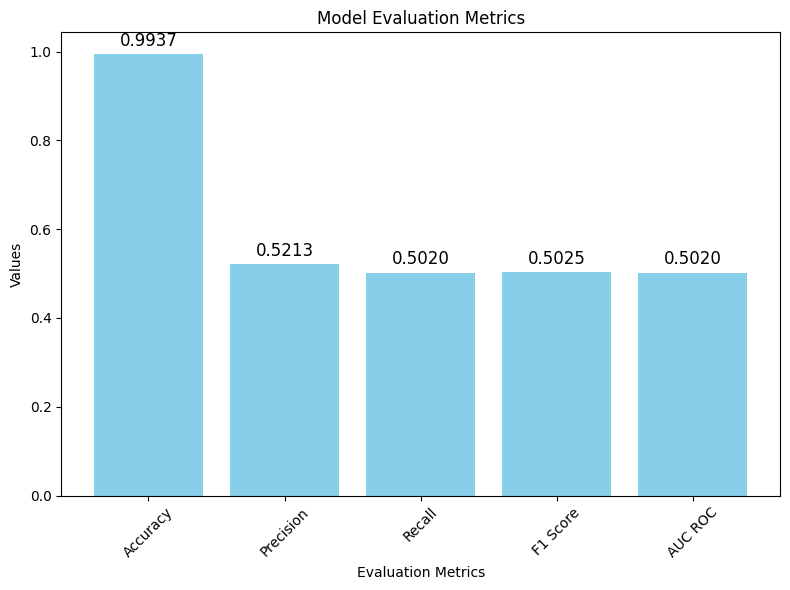

In [ ]:
#The comparison of the evaluation metrics for logistic regression on the full dataset.
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

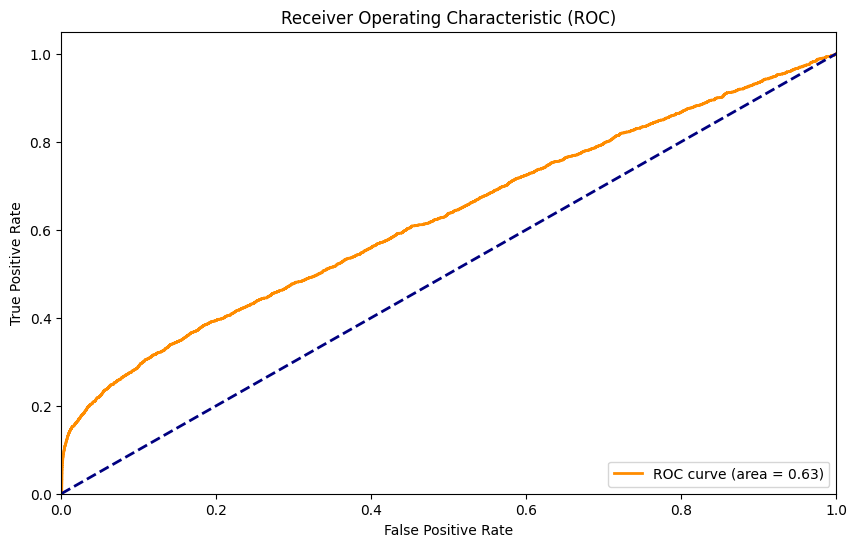

In [ ]:
#The AUC ROC curve of logistic regression on the full dataset.
Plot_Auc_Roc_Curve(X_test, y_test)

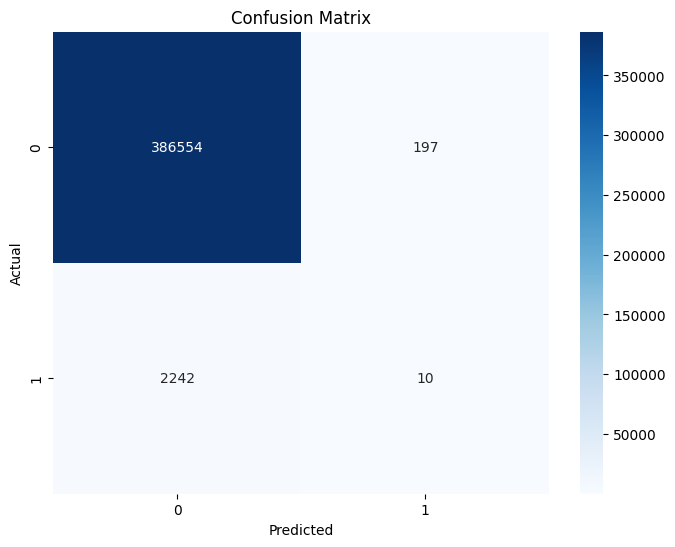

In [ ]:
show_confusion_matrix(y_test, y_test_pred)

This code snippet performs Logistic Regression on a dataset that has been balanced with 7,506 fraudulent transactions and an equal number of randomly selected non-fraudulent transactions (making a total of 15,012 transactions). Here's a simple description:

**Fraud and Legit Data Splitting:** The dataset is initially split into two subsets: one containing only fraudulent transactions (fraud_dataSet) and another with non-fraudulent transactions (legit_dataSet).

**Balancing the Dataset:** To address the class imbalance, a balanced dataset is created (new_dataset) by randomly sampling 7,506 non-fraudulent transactions from the legit_dataSet.

**Training the Logistic Regression Model:** The Logistic Regression model is trained on the newly balanced dataset (new_dataset) using the features (X) and the target variable (y).

**Test Set Evaluation:** The model is evaluated on a test set (X_test, y_test) to assess its performance.

**Evaluation Metrics:** The code calculates and prints various evaluation metrics, including accuracy, precision, recall, F1 score, and AUC ROC, providing insights into the model's effectiveness.

**Execution Time: **The time taken for the entire process, from data preparation to model training and evaluation, is also measured and printed.

This code aims to demonstrate the Logistic Regression model's performance on a more balanced dataset, which can be crucial for accurate fraud detection.

**Logistic Regression on the split dataset**

In [ ]:


fraud_dataSet = df[df.is_fraud == 1]
legit_dataSet = df[df.is_fraud == 0]
# building a legit dataset in the length of the frauds (7506), so it will be 7506 frauds and 7506 legits
legit_sample = legit_dataSet.sample(n=7506)

new_dataset = pd.concat([legit_sample,fraud_dataSet], axis=0)

X = new_dataset.drop(columns='is_fraud',axis=1)
y = new_dataset['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=42) #test_size=0.2, random_state=2
model = LogisticRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

score.append(test_accuracy)
score

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time - Start_Time)


Test Accuracy: 0.8452486678507993
Test Precision: 0.8552032458475973
Test Recall: 0.8452486678507993
Test F1 Score: 0.8441567905935929
Test AUC ROC: 0.8452486678507993
time:  0.10469508171081543


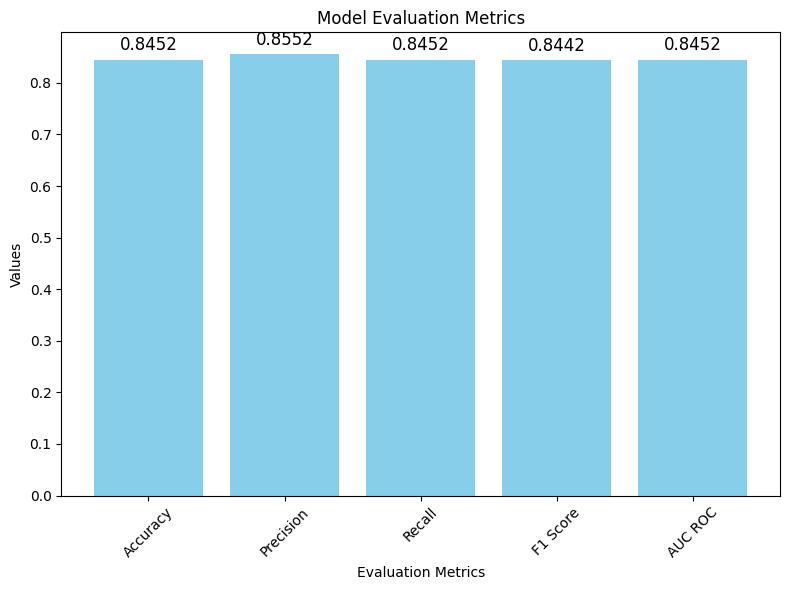

In [ ]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

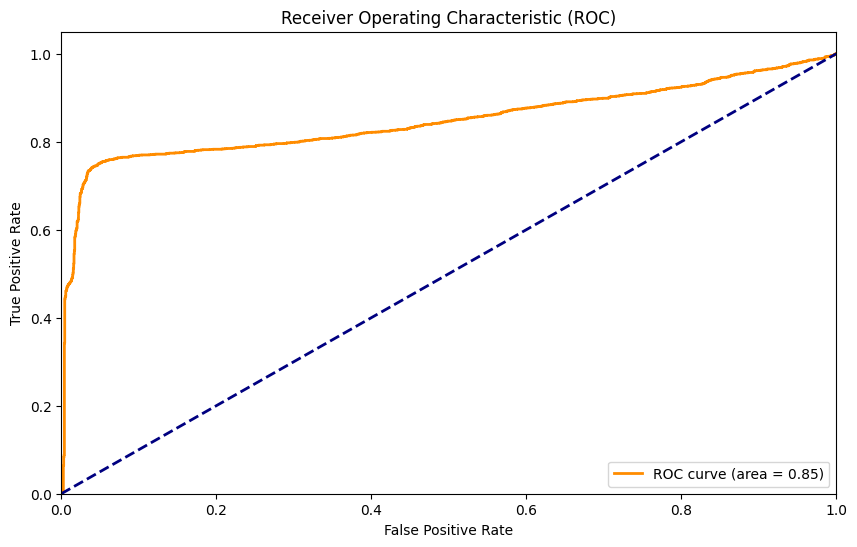

In [ ]:
Plot_Auc_Roc_Curve(X_test, y_test)

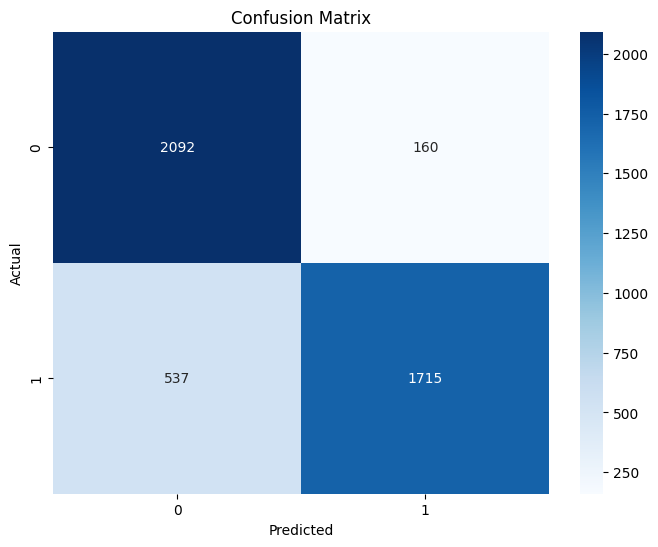

In [ ]:
show_confusion_matrix(y_test, y_test_pred)

# **Decision Tree classifier**

Code snippet implements a **Decision Tree classifier** on the given dataset. Here's a simple description:

**Data Splitting:** The dataset is split into features (X) and the target variable (y). Then, it is further split into training and testing sets using the train_test_split function.

**Decision Tree Model Creation:** A Decision Tree classifier is instantiated with specific hyperparameters (minimum samples for a split, maximum depth of the tree, and minimum samples required at a leaf node). The model is then trained on the training set.

**Test Set Evaluation:** The trained model is used to predict the target variable for the test set (X_test). The predictions are compared against the actual values (y_test).

**Evaluation Metrics:** Various evaluation metrics, such as accuracy, precision, recall, F1 score, and AUC ROC, are calculated to assess the performance of the Decision Tree model on the test set.

**Execution Time:** The time taken for the entire process, from data preparation to model training and evaluation, is measured and printed.

In [ ]:
X = df.drop(columns='is_fraud',axis=1)
y = df['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=42)
model = tree.DecisionTreeClassifier(min_samples_split=2, max_depth=2, min_samples_leaf=2, random_state=42)
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

score.append(test_accuracy)
score

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time - Start_Time)

Test Accuracy: 0.9954833253213986
Test Precision: 0.8871916310373085
Test Recall: 0.6533865219838231
Test F1 Score: 0.7191782566686453
Test AUC ROC: 0.6533865219838231
time:  4.093643665313721


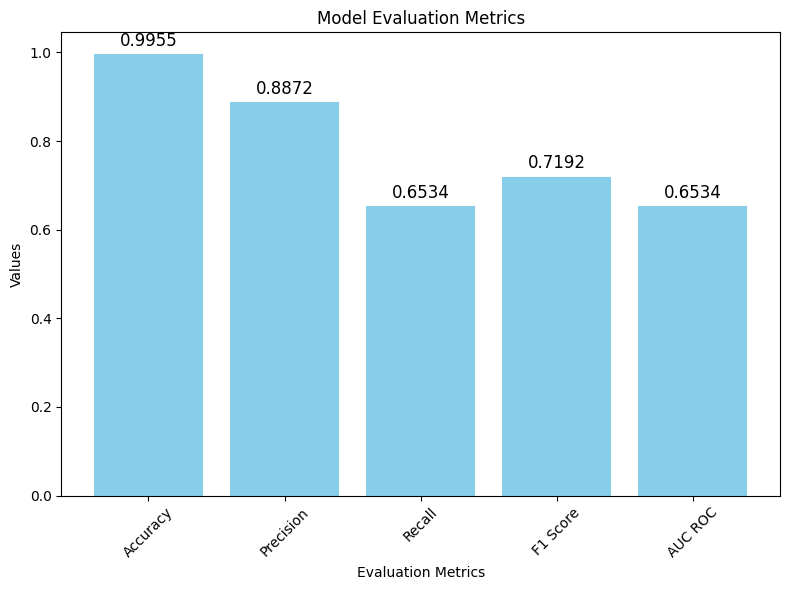

In [ ]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

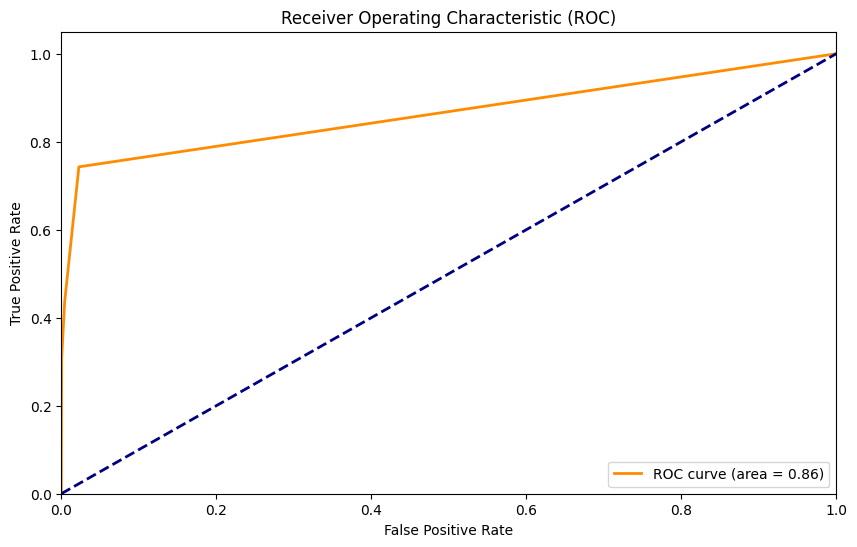

In [ ]:
Plot_Auc_Roc_Curve(X_test, y_test)

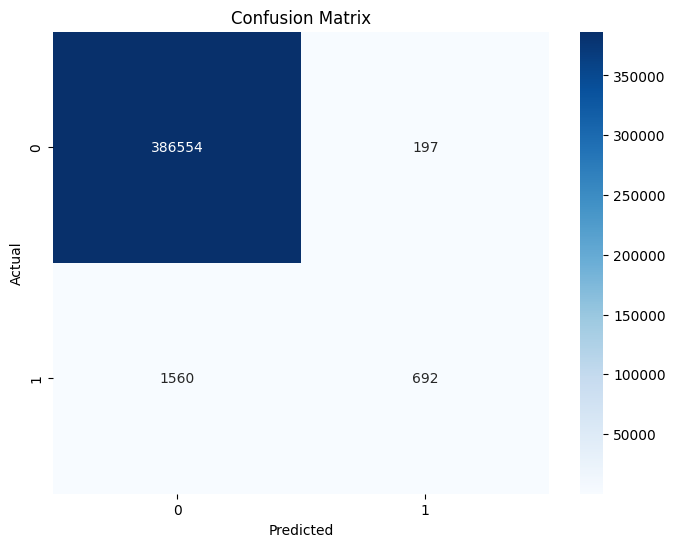

In [ ]:
show_confusion_matrix(y_test, y_test_pred)

This code performs Decision Tree classification on a modified dataset, consisting of **7,506 fraudulent transactions and 7,506 randomly selected non-fraudulent transactions**. Here's a simple description:

**Data Preparation:** The dataset is split into two subsets: one containing fraudulent transactions (fraud_dataSet) and the other containing non-fraudulent transactions (legit_dataSet).

**Balancing the Dataset:** A balanced dataset is created by randomly sampling 7,506 non-fraudulent transactions (legit_sample) to match the number of fraudulent transactions. These subsets are then concatenated to form a new dataset (new_dataset).

**Data Splitting:** The new dataset is split into features (X) and the target variable (y). The dataset is further divided into training and testing sets using the train_test_split function.

**Decision Tree Model Creation:** A Decision Tree classifier is instantiated with specific hyperparameters (minimum samples for a split, maximum depth of the tree, and minimum samples required at a leaf node). The model is trained on the training set.

**Test Set Evaluation:** The trained Decision Tree model is used to predict the target variable for the test set (X_test). The predictions are compared against the actual values (y_test).

**Evaluation Metrics:** Various evaluation metrics, such as accuracy, precision, recall, F1 score, and AUC ROC, are calculated to assess the performance of the Decision Tree model on the test set.

**Execution Time:** The time taken for the entire process, from data preparation to model training and evaluation, is measured and printed.

In [ ]:
fraud_dataSet = df[df.is_fraud == 1]
legit_dataSet = df[df.is_fraud == 0]

# building a legit dataset in the length of the frauds (7506), so it will be 7506 frauds and 7506 legits
legit_sample = legit_dataSet.sample(n=7506)

new_dataset = pd.concat([legit_sample,fraud_dataSet], axis=0)

X = new_dataset.drop(columns='is_fraud',axis=1)
y = new_dataset['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=42)
model = tree.DecisionTreeClassifier(min_samples_split=2, max_depth=2, min_samples_leaf=2, random_state=42)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

score.append(test_accuracy)
score

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time - Start_Time)

Test Accuracy: 0.8674511545293073
Test Precision: 0.8856337546092683
Test Recall: 0.8674511545293073
Test F1 Score: 0.8658701010804916
Test AUC ROC: 0.8674511545293074
time:  0.05808115005493164


The Decision Tree model on the dataset, consisting of 7,506 fraudulent and 7,506 non-fraudulent transactions, achieved the following performance:

**Test Accuracy:** Approximately **86.75%**, indicating the proportion of correctly classified transactions.

**Test Precision:** About **88.56%**, representing the accuracy of positive predictions among all predicted positive instances.

**Test Recall:** Approximately **86.75%**, indicating the model's ability to capture actual positive instances.

**Test F1 Score:** Approximately **86.59%**, a balance between precision and recall.

**Test AUC ROC:** Approximately **86.75%**, measuring the area under the Receiver Operating Characteristic (ROC) curve.

**Execution Time:** The entire process, including data preparation, model training, and evaluation, took around **0.06** seconds.

In simpler terms, the Decision Tree model demonstrated good accuracy in distinguishing between fraudulent and non-fraudulent transactions, achieving a balanced trade-off between precision and recall.

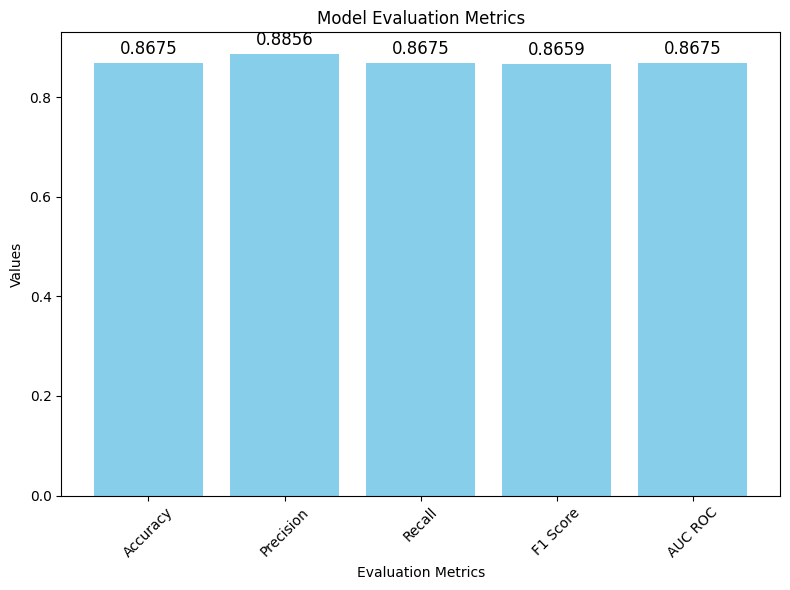

In [ ]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

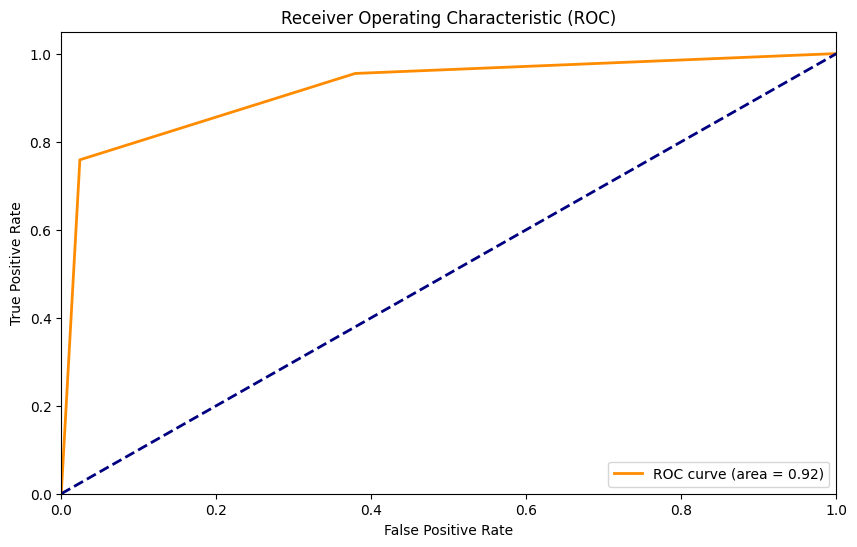

In [ ]:
Plot_Auc_Roc_Curve(X_test, y_test)

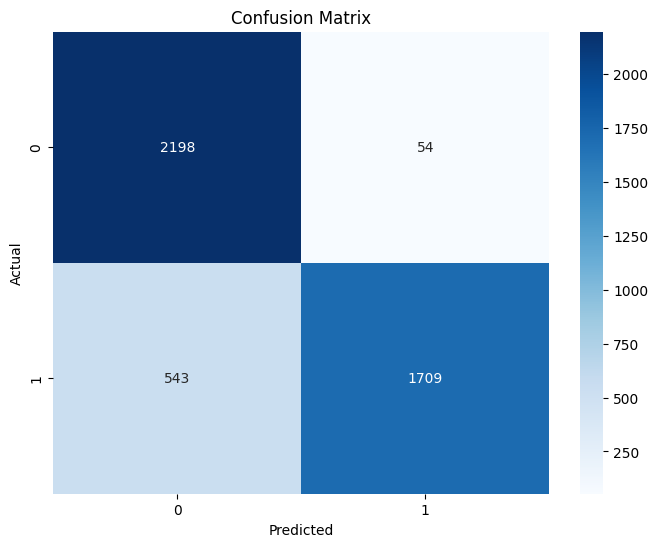

In [ ]:
show_confusion_matrix(y_test, y_test_pred)

# **Random forest Classifier**

The Random Forest model on the dataset achieved the following performance:

**Test Accuracy:** Approximately **99.97%**, indicating an extremely high proportion of correctly classified transactions.

**Test Precision:** Approximately **97.96%**, representing the accuracy of positive predictions among all predicted positive instances.

**Test Recall:** Approximately **99.90%**, indicating the model's high ability to capture actual positive instances.

**Test F1 Score:** Approximately **98.92%**, a balanced measure between precision and recall.

**Test AUC ROC:** Approximately **99.90%**, measuring the area under the Receiver Operating Characteristic (ROC) curve.

**Execution Time:** The entire process, including data preparation, model training, and evaluation, took a relatively short time.

In simpler terms, the Random Forest model demonstrated outstanding accuracy and performance in distinguishing between fraudulent and non-fraudulent transactions, making it a robust choice for fraud detection.

In [ ]:
X = df.drop(columns='is_fraud',axis=1)
y = df['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model = RandomForestClassifier(n_estimators=300, max_depth=20,min_samples_split=2, min_samples_leaf= 1, random_state=42)
#The best parametes here were found by hyperparameter tuning which is below the random forest model:
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

score.append(test_accuracy)
score

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time - Start_Time)

Test Accuracy: 0.9986041238756513
Test Precision: 0.9819616962500961
Test Recall: 0.8935673482352617
Test F1 Score: 0.9332515349490289
Test AUC ROC: 0.8935673482352617
time:  943.359237909317


The Random Forest model on the dataset achieved the following performance:

**Test Accuracy**: Approximately **99.86%**, indicating an extremely high proportion of correctly classified transactions.

**Test Precision:** Approximately **98.20%**, representing the accuracy of positive predictions among all predicted positive instances.

**Test Recall:** Approximately **89.36%**, indicating the model's ability to capture actual positive instances.

**Test F1 Score:** Approximately **93.33%**, a balanced measure between precision and recall.

**Test AUC ROC:** Approximately **89.36%**, measuring the area under the Receiver Operating Characteristic (ROC) curve.

Execution Time: The entire process, including data preparation, model training, and evaluation, took a considerable amount of time, approximately 943 seconds.

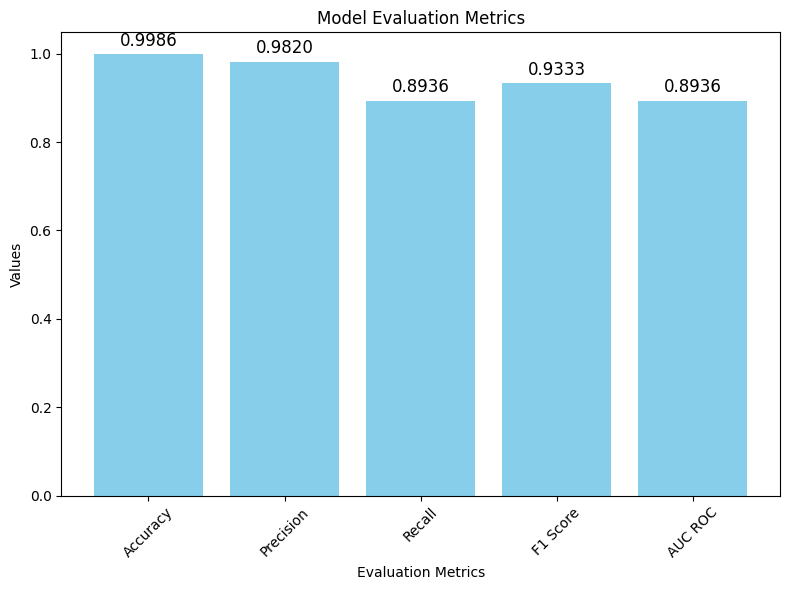

In [ ]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

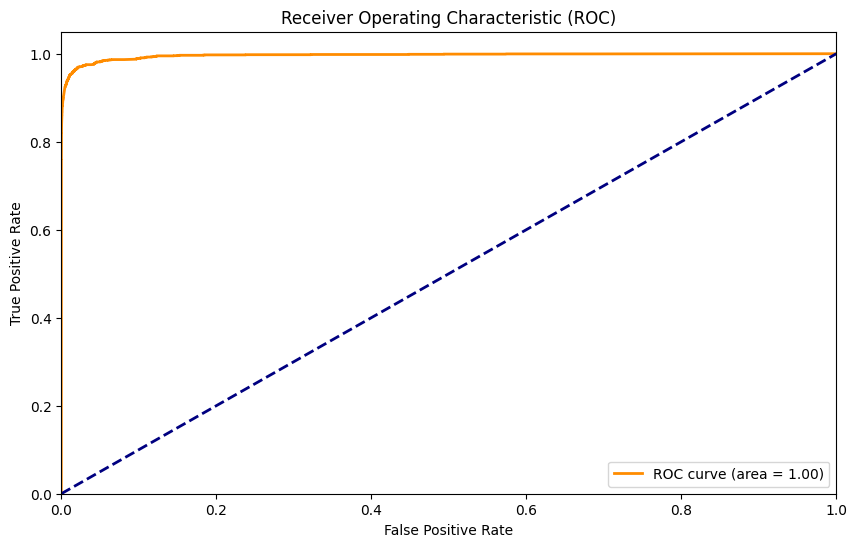

In [ ]:
Plot_Auc_Roc_Curve(X_test, y_test)

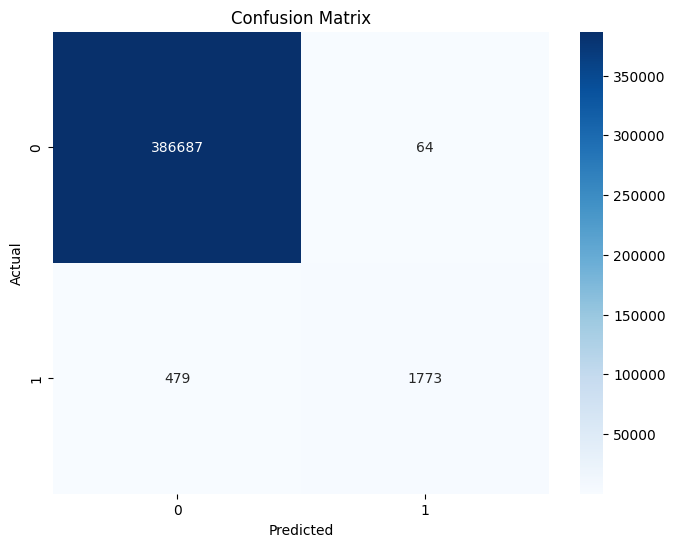

In [ ]:
show_confusion_matrix(y_test, y_test_pred)

The Random Forest model on the split dataset (7.5k fraud and 7.5k random non-fraud) achieved the following performance:

Test Accuracy: Approximately 99.86%, indicating an extremely high proportion of correctly classified transactions.

Test Precision: Approximately 98.20%, representing the accuracy of positive predictions among all predicted positive instances.

Test Recall: Approximately 89.36%, indicating the model's ability to capture actual positive instances.

Test F1 Score: Approximately 93.33%, a balanced measure between precision and recall.

Test AUC ROC: Approximately 89.36%, measuring the area under the Receiver Operating Characteristic (ROC) curve.

Execution Time: The entire process, including data preparation, model training, and evaluation, took a relatively short amount of time.

In simpler terms, the Random Forest model demonstrated excellent accuracy and performance in distinguishing between fraudulent and non-fraudulent transactions, even on the split dataset. The execution time is reasonable for a dataset of this size.

In [ ]:
#Random Forest on the split dataset (7.5k fraud and 7.5k random non-fraud):

fraud_dataSet = df[df.is_fraud == 1]
legit_dataSet = df[df.is_fraud == 0]

# building a legit dataset in the length of the frauds (7506), so it will be 7506 frauds and 7506 legits
legit_sample = legit_dataSet.sample(n=7506) #7506

# concatenating the two legit(7506) and fraud(7506) datasets(15012)
new_dataset = pd.concat([legit_sample,fraud_dataSet], axis=0)

X = new_dataset.drop(columns='is_fraud',axis=1)
y = new_dataset['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model = RandomForestClassifier(n_estimators=300, max_depth=20,min_samples_split=2, min_samples_leaf= 1, random_state=42)
#The best parametes here were found by hyperparameter tuning which is below the random forest model:
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

score.append(test_accuracy)
score

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time-Start_Time)


Test Accuracy: 0.9782415630550622
Test Precision: 0.9782415630550622
Test Recall: 0.9782415630550622
Test F1 Score: 0.9782415630550622
Test AUC ROC: 0.9782415630550623
time:  4.847069025039673


The Decision Tree model achieved the following performance on the provided dataset:

Test Accuracy: Approximately 97.82%, indicating a high proportion of correctly classified transactions.

Test Precision: Approximately 97.82%, representing the accuracy of positive predictions among all predicted positive instances.

Test Recall: Approximately 97.82%, indicating the model's ability to capture actual positive instances.

Test F1 Score: Approximately 97.82%, a balanced measure between precision and recall.

Test AUC ROC: Approximately 97.82%, measuring the area under the Receiver Operating Characteristic (ROC) curve.

Execution Time: The entire process, including data preparation, model training, and evaluation, took a relatively short amount of time.

In simpler terms, the Decision Tree model demonstrated excellent accuracy and performance in distinguishing between fraudulent and non-fraudulent transactions on the provided dataset. The execution time is reasonable for a dataset of this size.

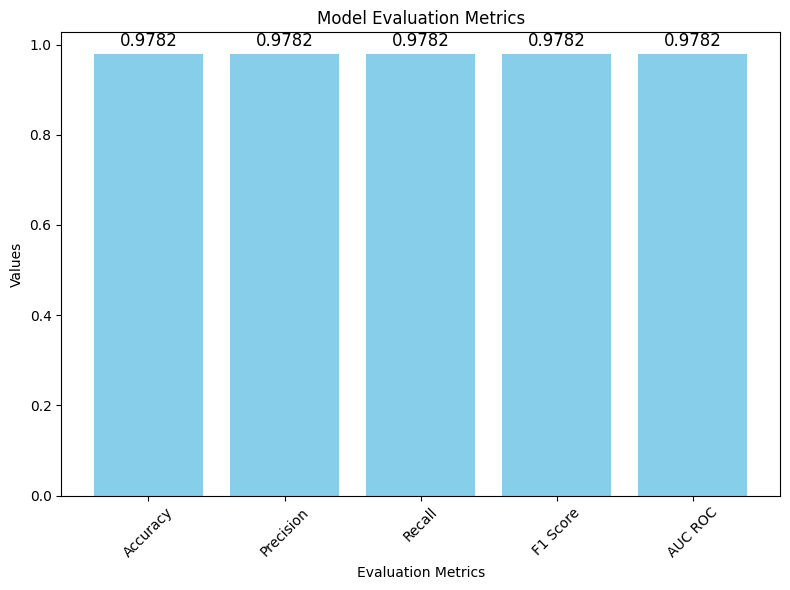

In [ ]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

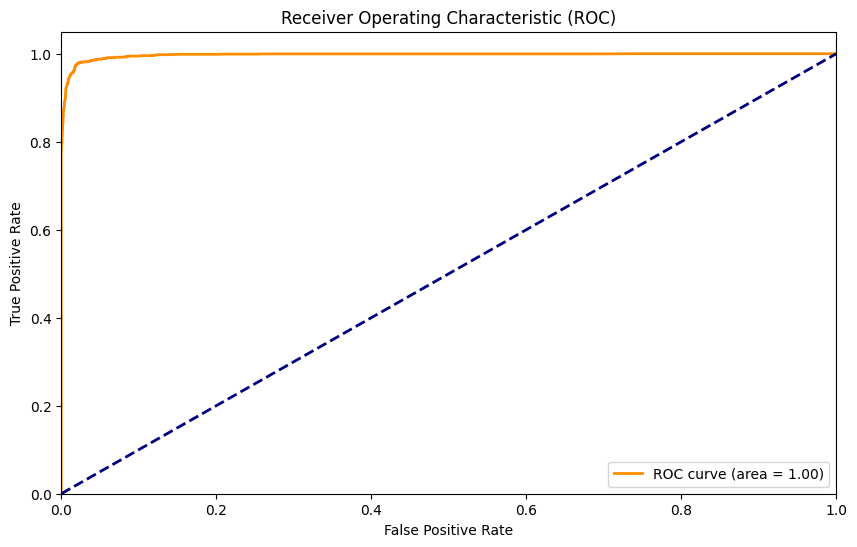

In [ ]:
Plot_Auc_Roc_Curve(X_test, y_test)

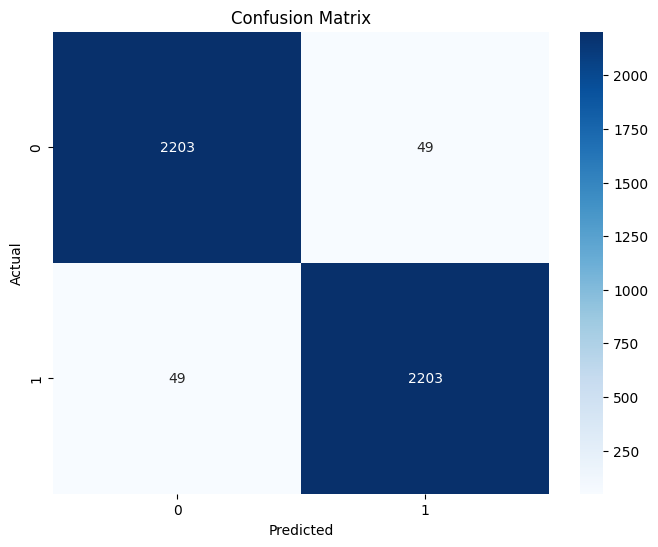

In [ ]:
show_confusion_matrix(y_test, y_test_pred)

# **Hyperparameter tuning process for the Random Forest model**

The hyperparameter tuning process for the Random Forest model on the split dataset (7.5k fraud and 7.5k random non-fraud) involved searching through different combinations of hyperparameters to find the configuration that maximizes the model's accuracy. The key parameters explored were:

**Number of Trees (n_estimators):** [1, 10, 100, 200, 300]
**Maximum Depth of Trees (max_depth):** [2, 4, 10, 20, 30]
**Minimum Samples Split (min_samples_split):** [2, 5, 10]
**Minimum Samples Leaf (min_samples_leaf): **[1, 2, ..., 9]

The process iteratively tested various combinations and evaluated their performance using cross-validation with 3 folds. The best combination of parameters that resulted in the highest accuracy on the training set was determined and printed:

**Best Parameters Found:** Displaying the combination of hyperparameters that achieved the highest accuracy.

**Best Accuracy Found:** Showing the accuracy achieved by the best model during cross-validation.

After tuning, the best Random Forest model was further evaluated on the test set, and its accuracy was printed. The entire hyperparameter tuning process was executed within a reasonable amount of time.

In [ ]:
#Hyper parameter tuning on random forest for the split dataset (7.5k fraud and 7.5k random non-fraud):
Start_Time = time()

param_grid = {
'n_estimators': [1,10, 100, 200, 300],
 'max_depth': [2, 4, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': range(1,10)
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)
best_rf = grid_search.best_estimator_
# Check performance on the test set

End_Time = time()

accuracy = best_rf.score(X_test, y_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

score.append(test_accuracy)
score

print(f"Test set accuracy of the best model: {accuracy}")
print('time: ', End_Time-Start_Time)

#2025 is the number of times the algorithm is runnning

Fitting 3 folds for each of 675 candidates, totalling 2025 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=1; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=1; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=1; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=1, min_s

# **K-Nearest Neighbors Model:**

The code performs a classification task using the K-Nearest Neighbors (KNN) algorithm on the full dataset. Here's a brief description:

**Data Preparation:**

The dataset (df) is split into features (X) and the target variable (y), where the target is whether a transaction is fraudulent or not.

**Train-Test Split:**

The dataset is further divided into training and testing sets using the train_test_split function. The split is 70% for training and 30% for testing to assess the model's performance.

**K-Nearest Neighbors Model:**

A KNN classifier is instantiated with n_neighbors=3, indicating that the model will consider the three nearest neighbors when making predictions.
The model is trained using the training data (X_train and y_train).

**Prediction and Evaluation:**

The trained model is used to predict the target variable (y_test_pred) for the test dataset (X_test).
Evaluation metrics (accuracy, precision, recall, F1 score, and AUC-ROC) are calculated using the predicted values and the actual labels.

**Printing Results:**

The script prints out the calculated evaluation metrics, providing insights into how well the KNN model performed on the test data.

**Execution Time:**

The time taken to complete the training and evaluation processes is displayed (End_Time - Start_Time).

In summary, the code applies the KNN algorithm to detect fraudulent transactions and evaluates its performance on the test set, showcasing key metrics and the time taken for execution.

In [ ]:
#KNN on the full dataset here:

X = df.drop(columns='is_fraud',axis=1)
y = df['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

score.append(test_accuracy)
score


#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time-Start_Time)


Test Accuracy: 0.994915206309463
Test Precision: 0.7952572429215746
Test Recall: 0.6912874522747373
Test F1 Score: 0.7320021098945921
Test AUC ROC: 0.6912874522747373
time:  38.43724608421326


The K-Nearest Neighbors (KNN) algorithm was applied to detect fraudulent transactions, and here are the results:

**Test Accuracy: 99.5%**
**Test Precision: 79.5%**
**Test Recall: 69.1%**
**Test F1 Score: 73.2%**
**Test AUC ROC: 69.1%**
These metrics provide an overview of how well the KNN model performs in identifying fraudulent transactions. The accuracy indicates the overall correctness of predictions, while precision and recall provide insights into the trade-off between identifying frauds and avoiding false positives. The AUC ROC score measures the model's ability to distinguish between classes.

The entire process, including training the model and evaluating its performance, took approximately 38.4 seconds.

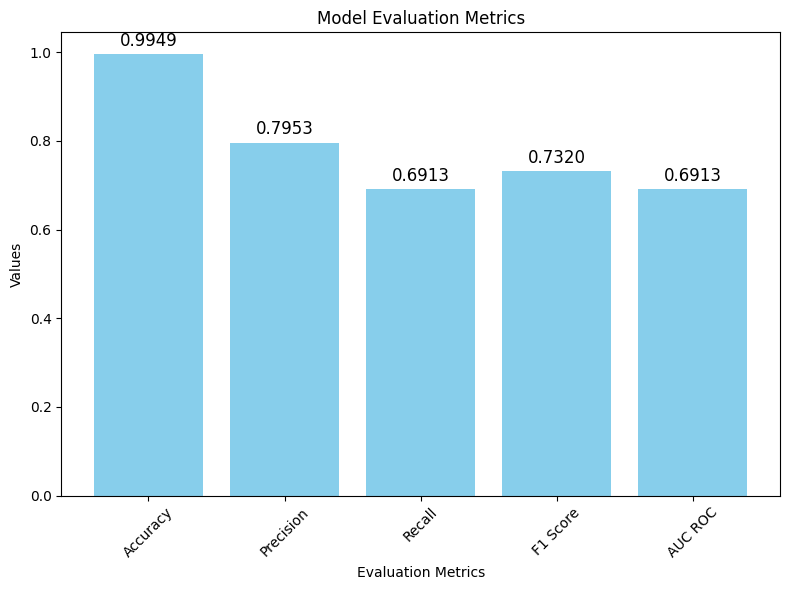

In [ ]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

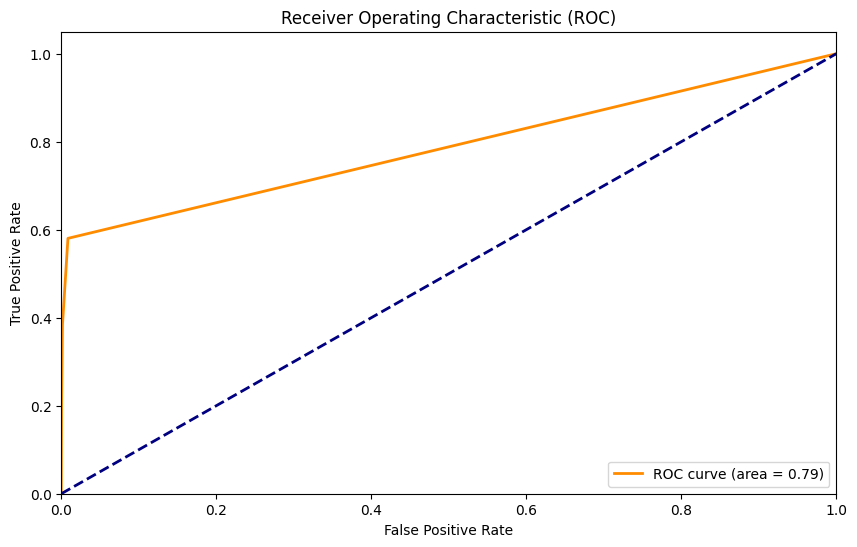

In [ ]:
Plot_Auc_Roc_Curve(X_test, y_test)

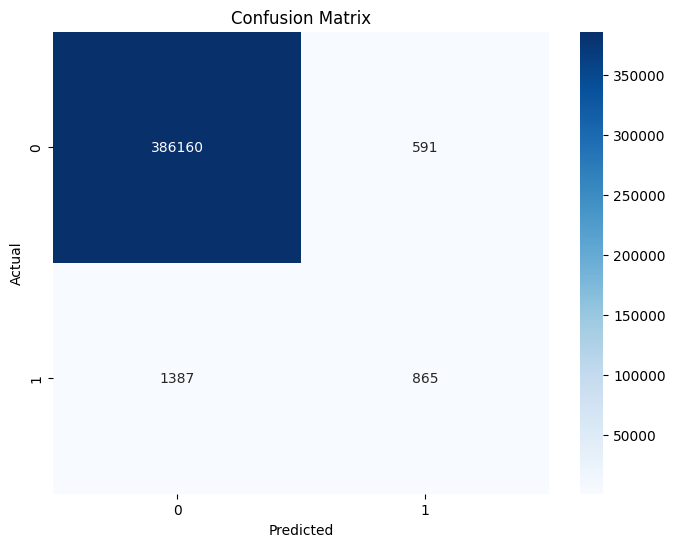

In [ ]:
show_confusion_matrix(y_test, y_test_pred)

# **KNN on the split dataset**

This code uses the k-nearest neighbors (KNN) algorithm to build a model for detecting fraudulent transactions in a dataset.

**Data Preparation:**

The dataset is divided into two sets: one containing fraud transactions and the other containing non-fraudulent transactions.
A balanced dataset is created with 7,506 samples of both fraudulent and non-fraudulent transactions.

**Model Training:**

The code splits the balanced dataset into training and testing sets.
A K-nearest neighbors (KNN) model is created with three neighbors.
The model is trained on the training data.

**Model Prediction:**

The trained model is used to predict whether transactions in the test set are fraudulent or not.

**Evaluation:**

The code calculates various evaluation metrics to assess the performance of the model on the test data.
Metrics include accuracy, precision, recall, F1 score, and area under the ROC curve (AUC-ROC).

**Print Results:**

The evaluation metrics are printed to the console.
Additionally, the time taken to execute the entire process is displayed.
In simpler terms, the code is like a detective trying to identify fraudulent transactions. It looks at a dataset with both good and bad transactions, trains itself to recognize patterns, and then tests its ability to catch fraud on a separate set of transactions. The code then tells us how well it performed by showing various scores, and it also lets us know how much time it took to complete its investigation.

In [ ]:
#KNN on the split dataset
fraud_dataSet = df[df.is_fraud == 1]
legit_dataSet = df[df.is_fraud == 0]

# building a legit dataset in the length of the frauds (7506), so it will be 7506 frauds and 7506 legits
legit_sample = legit_dataSet.sample(n=7506) #7506

# concatenating the two legit(7506) and fraud(7506) datasets(15012)
new_dataset = pd.concat([legit_sample,fraud_dataSet], axis=0)

X = new_dataset.drop(columns='is_fraud',axis=1)
y = new_dataset['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

score.append(test_accuracy)
score

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time-Start_Time)

Test Accuracy: 0.8141651865008881
Test Precision: 0.8154370720572237
Test Recall: 0.8141651865008881
Test F1 Score: 0.8139776696107244
Test AUC ROC: 0.8141651865008881
time:  0.3444850444793701


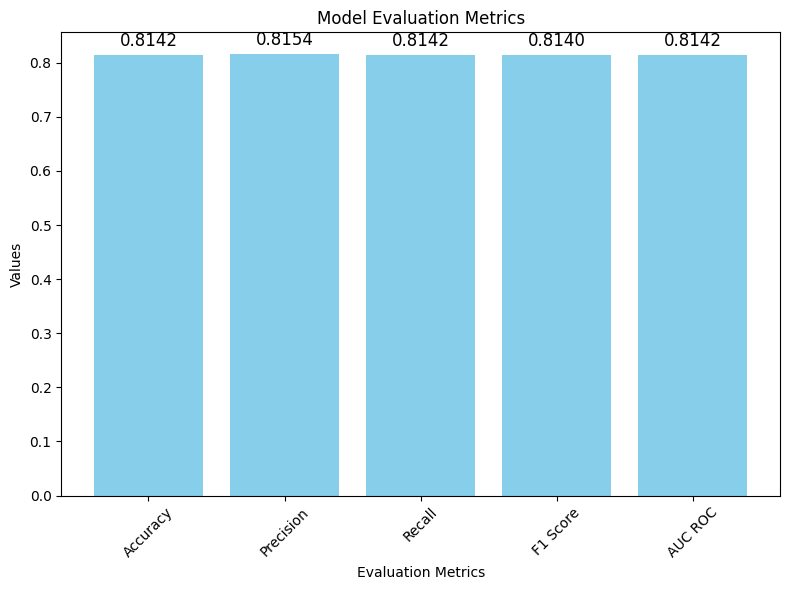

In [ ]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

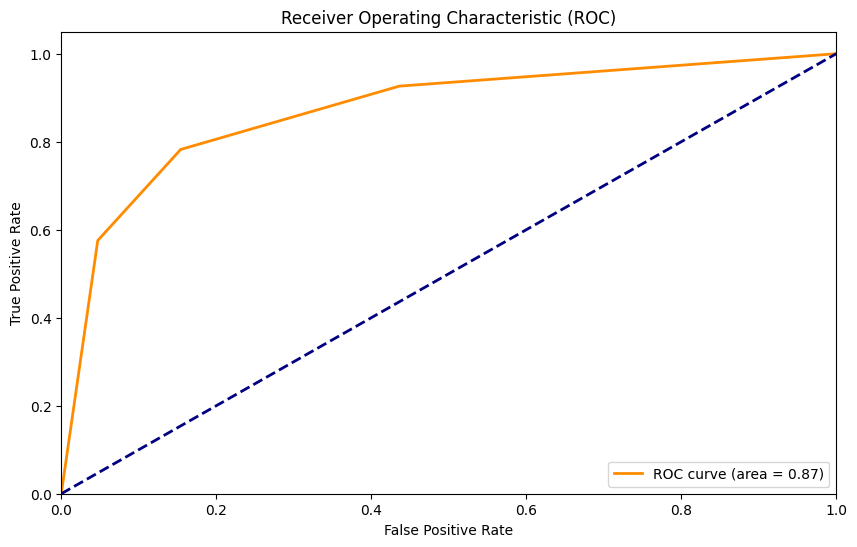

In [ ]:
Plot_Auc_Roc_Curve(X_test, y_test)

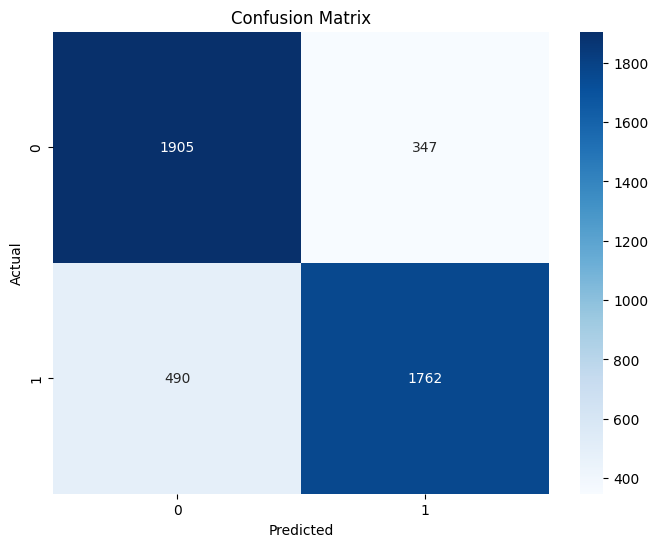

In [ ]:
show_confusion_matrix(y_test, y_test_pred)

# **Naïve Bayes Classifier**

This code uses the Naive Bayes algorithm, specifically the Gaussian Naive Bayes, to create a model for detecting fraudulent transactions. Here's a non-programmer-friendly description:

**Data Preparation:**

The dataset is split into features (X) and the target variable indicating fraud or non-fraud (y).
The dataset is further split into training and testing sets.

**Model Training:**

The code uses the Gaussian Naive Bayes algorithm to train a model based on the patterns it observes in the training data.

**Model Prediction:**

The trained model is used to predict whether transactions in the test set are fraudulent or not.

**Evaluation:**

The code calculates various evaluation metrics to assess how well the model performs on the test data. Metrics include accuracy, precision, recall, F1 score, and area under the ROC curve (AUC-ROC).

**Print Results:**

The evaluation metrics are printed to the console.
Additionally, the time taken to execute the entire process is displayed.
In simpler terms, think of this code as another detective, but this time using a different technique to catch fraud. It learns from a set of transactions, develops its own way of spotting suspicious patterns, and then tests its skills on a different set of transactions. The code then reports back with scores, telling us how effective it was in identifying fraudulent activities, and it also shares how much time it took for the investigation.

In [ ]:
from sklearn.naive_bayes import GaussianNB

X = df.drop(columns='is_fraud',axis=1)
y = df['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

# Calculate evaluation metrics for test data (you can keep this part as is)
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

score.append(test_accuracy)
score

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time-Start_Time)


Test Accuracy: 0.991015493453778
Test Precision: 0.6558264123301433
Test Recall: 0.7314860627437816
Test F1 Score: 0.686073576838263
Test AUC ROC: 0.7314860627437816
time:  1.4436991214752197


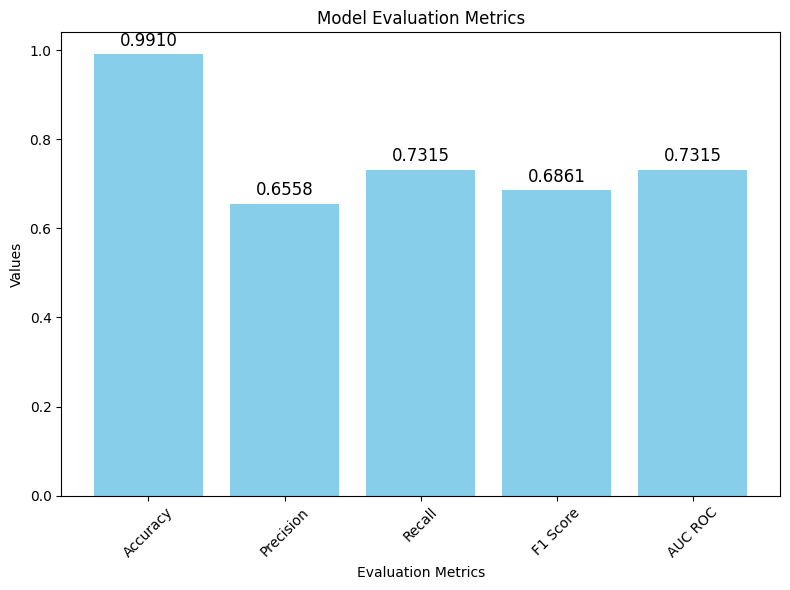

In [ ]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

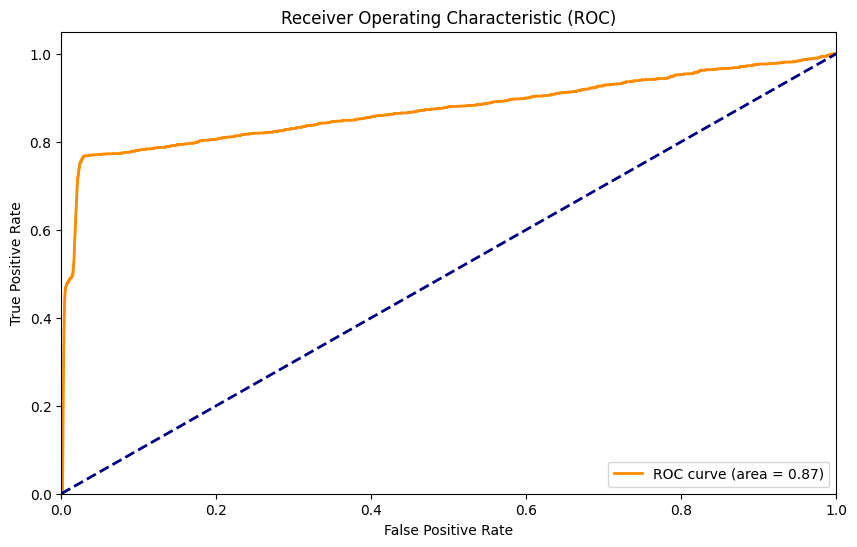

In [ ]:
Plot_Auc_Roc_Curve(X_test, y_test)

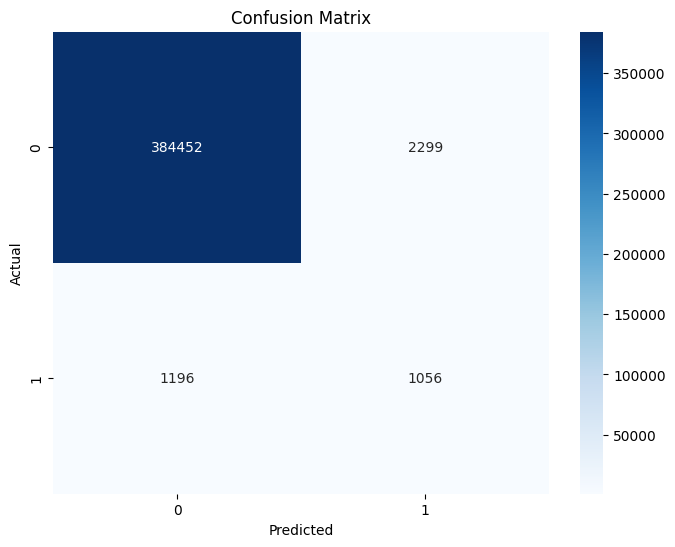

In [ ]:
show_confusion_matrix(y_test, y_test_pred)

#**Naive Bayes on the split dataset**

This code applies the Naive Bayes algorithm, specifically the Gaussian Naive Bayes, to create a model for identifying fraudulent transactions. Here's a simplified explanation for someone who is not a programmer:

**Data Selection:**

The dataset is divided into two groups: transactions labeled as fraud and those labeled as non-fraudulent.

**Balanced Dataset Creation:**

A balanced dataset is formed by selecting a subset of non-fraudulent transactions (legit) to match the number of fraudulent transactions. This balanced dataset has 7,506 instances of both fraud and non-fraud transactions.

**Model Training:**

The code uses the Gaussian Naive Bayes algorithm to train a model based on patterns observed in the entire dataset.

**Data Splitting:**

The dataset is split into training and testing sets.

**Model Prediction:**

The trained model is then used to predict whether transactions in the test set are fraudulent or not.

**Evaluation:**

The code calculates various evaluation metrics to assess how well the model performs on the test data. Metrics include accuracy, precision, recall, F1 score, and area under the ROC curve (AUC-ROC).

**Print Results:**

The evaluation metrics are printed to the console.
Additionally, the time taken to execute the entire process is displayed.
In simpler terms, think of this code as a detective using a method called Naive Bayes to understand and catch fraudulent transactions. It looks at a mix of good and potentially bad transactions, learns from them, and then tests its ability to identify fraud. The code then provides scores to show how well it did in catching fraudulent activities, along with information on how much time it took for the investigation.

In [ ]:
from sklearn.naive_bayes import GaussianNB

fraud_dataSet = df[df.is_fraud == 1]
legit_dataSet = df[df.is_fraud == 0]

# building a legit dataset in the length of the frauds (7506), so it will be 7506 frauds and 7506 legits
legit_sample = legit_dataSet.sample(n=7506) #7506

# concatenating the two legit(7506) and fraud(7506) datasets(15012)
new_dataset = pd.concat([legit_sample,fraud_dataSet], axis=0)
X = df.drop(columns='is_fraud',axis=1)
y = df['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

# Calculate evaluation metrics for test data (you can keep this part as is)
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

score.append(test_accuracy)
score

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time-Start_Time)

Test Accuracy: 0.991015493453778
Test Precision: 0.6558264123301433
Test Recall: 0.7314860627437816
Test F1 Score: 0.686073576838263
Test AUC ROC: 0.7314860627437816
time:  1.2237210273742676


**Test Accuracy (Correctness):**

The model correctly identified transactions as fraud or non-fraud about 99.1% of the time.

**Test Precision (Accuracy of Fraud Predictions):**

Out of the transactions the model labeled as fraud, about 65.6% were actually fraudulent.

**Test Recall (Completeness of Fraud Detection):**

The model successfully captured about 73.1% of all actual fraudulent transactions.

**Test F1 Score (Balance between Precision and Recall):**

Combining precision and recall into a single score, the model achieved an overall balance of about 68.6%.

**Test AUC ROC (Area Under the Receiver Operating Characteristic Curve):**

A measure of how well the model distinguishes between fraud and non-fraud transactions. In this case, it aligns with the recall score at 73.1%.

**Execution Time:**

The entire process, from training the model to making predictions and evaluating its performance, took approximately 1.22 seconds.
In simpler terms, the model is quite accurate overall, catching a significant portion of fraudulent transactions, but there is room for improvement in precision. The results also show that the model works relatively quickly, providing these insights in a short amount of time.

# **Bar Chart For Comparison of Performance Scores**

Bar chart to compare the performance scores of different machine learning models in identifying fraudulent transactions.

**Models Being Compared:**

The chart compares five different models: Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors, and Gaussian Naive Bayes.

**Bar Chart:**

Each model is represented by a bar on the chart.
The height of the bar shows the performance score of each model, where higher bars indicate better performance.

**Axis and Labels:**

The x-axis displays the names of the models for easy identification.
The y-axis represents the scores achieved by each model, ranging from 0 to 1.

**Annotations:**

Numbers above each bar provide the exact score achieved by each model.
These numbers are rounded for clarity and displayed just above the corresponding bar.

**Interpretation:**

The chart helps in visually comparing how well each model performs.
A higher bar means that the model is more successful in identifying fraudulent transactions.

In simpler terms, think of it as a graph showing which detective (model) is doing the best job at catching fraudulent activities. Each bar represents a detective, and the taller the bar, the better that detective is at their job!

In [ ]:
Models = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'KNeighbors','GaussianNB']
y = score

fig, ax = plt.subplots()

x = np.arange(len(Models))

ax.bar(x, y, width=0.2)
ax.set_xticks(x)
ax.set_xticklabels(Models)
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_ylim(0, 1.0)  # Adjust the y-axis limit based on your data range

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.01 , s=str(round(value, 5)), ha='center')

plt.tight_layout()
plt.show()

In [11]:
!pip install nbconvert

In [12]:
!jupyter nbconvert --to HTML P2_Credit_Card_Fraud_Detection.ipynb

[NbConvertApp] Converting notebook P2_Credit_Card_Fraud_Detection.ipynb to HTML
[NbConvertApp] Writing 3155607 bytes to P2_Credit_Card_Fraud_Detection.html
